In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random
from collections import Counter
from os import system,remove 
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
def split_list(l, n):
  # 將list分割 (l:list, n:每個matrix裡面有n個元素)
  for idx in range(0, len(l), n):
    yield l[idx:idx+n]

def Average_list(D_list=[],j_list=[]):
    Nor_J=[]
    Nor_D=[]
    Nor_I=[]
    for i in range(len(D_list)):
        a=0
        for j in range(len(Nor_D)):
            if(D_list[i]==Nor_D[j]):
                Nor_I[j]+=1
                Nor_J[j]+=j_list[i]
                a=a+1
        if(a==0):
            Nor_D.append(D_list[i])
            Nor_I.append(1)
            Nor_J.append(j_list[i])
    for i in range(len(Nor_J)):
        Nor_J[i]=Nor_J[i]/Nor_I[i]
    return Nor_D,Nor_J

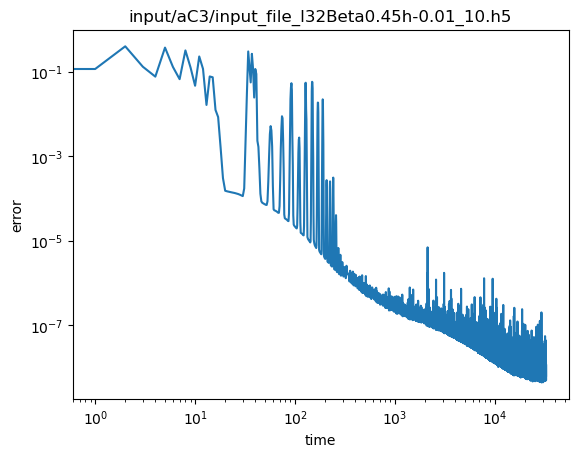

In [3]:
betas=np.linspace(0.1,1.95,38)
beta_cri=0.45
field=-0.01
linear_size=32

l32ising_Mlist=[]
l32ising_Elist=[]
l32ising_E2list=[]
l32ising_MElist=[]
l32ising_New_Mlist=[]
l32ising_aC_list=[]
l32ising_aC3_list=[]
l32ising_aC4_list=[]
l32ising_draw_list3=[]
l32ising_draw_list4=[]
l32ising_cv=[]
l32ising_dMdT=[]

n=f'l{linear_size:.04g}Beta{beta_cri:.04g}h{field:.04g}_10'

static_file=f'selection_mc/aC3/statics_{n}.h5'
for beta in betas:
    filename=f'selection_mc/aC3/statics_l32Beta{beta:.03g}h{field:.04g}.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        E=list(f['E'][:])
        E2=list(f['E2'][:])
        ME=list(f['ME'][:])
        M=list(f['Mtotal'][:])
        
        l32ising_Elist.append(f['E'][()])
        l32ising_E2list.append(f['E2'][()])
        l32ising_MElist.append(f['ME'][()])
        l32ising_Mlist.append(f['E'][()])

        l32ising_draw_list3.append(f['draw_list3'][()])
        l32ising_draw_list4.append(f['draw_list4'][()])
        
        l32ising_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
        l32ising_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
    filename=f'selection_mc/aC3/subsample_l32Beta{beta:.03g}h{field:.04g}_10.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        l32ising_aC_list.append(f['c'][()])
        l32ising_aC3_list.append(f['aC3'][()])
        l32ising_aC4_list.append(f['aC4'][()])

data = np.load(f'blresult/aC3/blresult_{n}.npz',allow_pickle=True)
# lst = data.files
# print(lst)
# for item in lst:
#     # print(item)
#     print(data[item])w
state=data['state'][()]
h=state['hjbest'][:64]
j=state['hjbest'][64:]



filename=f'input/aC3/input_file_{n}.h5'
with h5py.File(filename, "w") as f:
# f.create_dataset('h',data=h)
# f.create_dataset('j',data=j)
    f['h']=h
    f['j']=j
    f['draw_list3']=l32ising_draw_list3[0]
    f['draw_list4']=l32ising_draw_list4[0]
error=data['error'][()]
plt.plot(error['mses'])
plt.title(f'{filename}')
plt.xlabel('time')
plt.ylabel('error')

plt.yscale('log')
plt.xscale('log')

l32sspin_aC=[]
l32sspin_cv=[]
l32sspin_dMdT=[]
l32sspin_aC3=[]
l32sspin_aC4=[]
# sspin_config2_allh001=[]
# print(filename)
niter=10000

for beta in betas:
    prmf=filename
    datf = f'output/aC3/output_{n}.h5'
    system(f'nice -n +20 ./sspin2 {prmf} {datf} {niter} --beta={beta:.03g}')
    with h5py.File(datf, "r") as f:
        E = f['result1']['aE'][()]
        E2 =f['result1']['aE2'][()]
        M=f['result1']['aM'][()]
        M2=f['result1']['aM2'][()]
        ME=f['result1']['aME'][()]
        aC=f['result1']['aC'][()]
        aC3=f['result1']['aC3'][()]
        aC4=f['result1']['aC4'][()]

        cnt=f['result1']['cnt'][()]
        # print(E)
        l32sspin_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
        l32sspin_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
        l32sspin_aC.append(aC)
        l32sspin_aC3.append(aC3)
        l32sspin_aC4.append(aC4)

7
0.44999999999999996


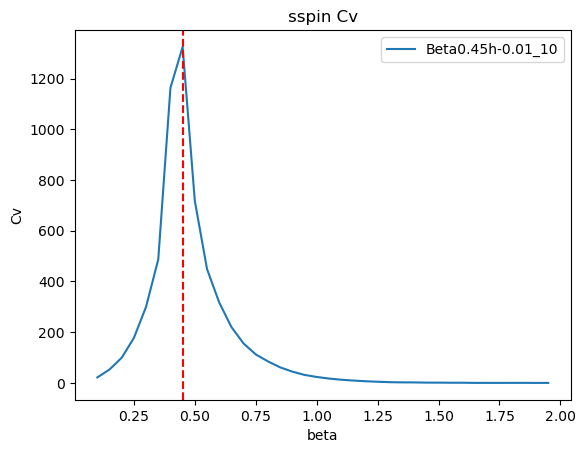

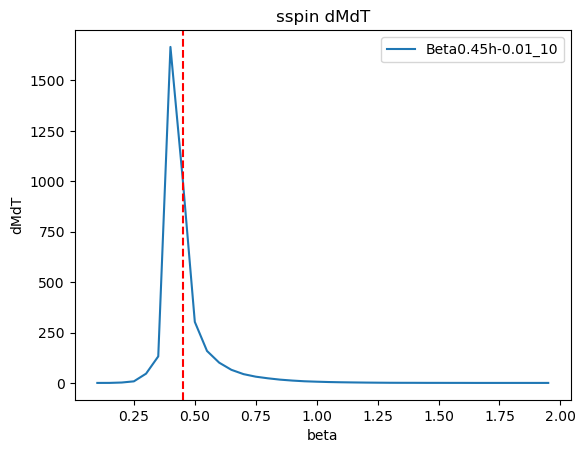

In [4]:
print(ising_index:=np.argmin(np.abs(np.array(l32ising_cv)-max(l32ising_cv))))
print(betas[ising_index])

plt.plot(betas,l32ising_cv,label=f'Beta0.45h-0.01_10')
plt.xlabel('beta')
plt.ylabel('Cv')
plt.title('sspin Cv')
plt.axvline(betas[ising_index],color = 'r',ls='--')
plt.legend()

plt.figure()

plt.plot(betas,l32ising_dMdT,label=f'Beta0.45h-0.01_10')

plt.xlabel('beta')
plt.ylabel('dMdT')
plt.title('sspin dMdT')
plt.axvline(betas[ising_index],color = 'r',ls='--')
plt.legend()

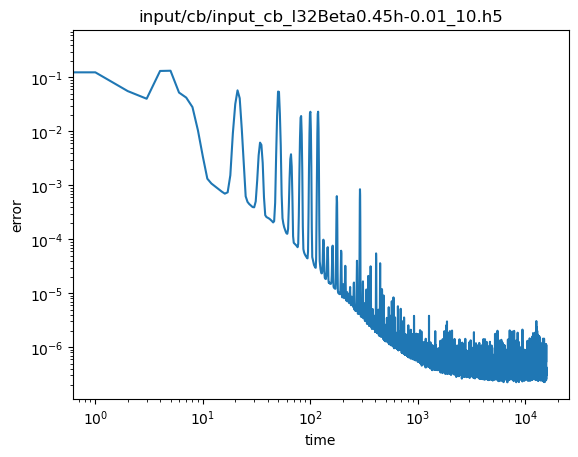

In [5]:
l32ising_cb_Mlist=[]
l32ising_cb_Elist=[]
l32ising_cb_E2list=[]
l32ising_cb_MElist=[]
l32ising_cb_New_Mlist=[]
l32ising_cb_aC_list=[]
l32ising_cb_aC3_list=[]
l32ising_cb_aC4_list=[]
l32ising_cb_draw_list3=[]
l32ising_cb_draw_list4=[]
l32ising_cb_cv=[]
l32ising_cb_dMdT=[]

n=f'l{linear_size:.04g}Beta{beta_cri:.04g}h{field:.04g}_10'

static_file=f'selection_mc/cb/cb_statics_{n}.h5'
for beta in betas:
    filename=f'selection_mc/cb/cb_statics_l32Beta{beta:.03g}h{field:.04g}.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        E=list(f['E'][:])
        E2=list(f['E2'][:])
        ME=list(f['ME'][:])
        M=list(f['Mtotal'][:])
        
        l32ising_cb_Elist.append(f['E'][()])
        l32ising_cb_E2list.append(f['E2'][()])
        l32ising_cb_MElist.append(f['ME'][()])
        l32ising_cb_Mlist.append(f['E'][()])

        l32ising_cb_draw_list3.append(f['draw_list3'][()])
        l32ising_cb_draw_list4.append(f['draw_list4'][()])
        
        l32ising_cb_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
        l32ising_cb_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
    filename=f'selection_mc/cb/cb_subsample_l32Beta{beta:.03g}h{field:.04g}_10.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        l32ising_cb_aC_list.append(f['c'][()])
        l32ising_cb_aC3_list.append(f['aC3'][()])
        l32ising_cb_aC4_list.append(f['aC4'][()])

data = np.load(f'blresult/cb/cb_blresult_{n}.npz',allow_pickle=True)
# lst = data.files
# print(lst)
# for item in lst:
#     # print(item)
#     print(data[item])w
state=data['state'][()]
h=state['hjbest'][:64]
j=state['hjbest'][64:]



filename=f'input/cb/input_cb_{n}.h5'
with h5py.File(filename, "w") as f:
# f.create_dataset('h',data=h)
# f.create_dataset('j',data=j)
    f['h']=h
    f['j']=j
    f['draw_list3']=l32ising_cb_draw_list3[0]
    f['draw_list4']=l32ising_cb_draw_list4[0]
error=data['error'][()]
plt.plot(error['mses'])
plt.title(f'{filename}')
plt.xlabel('time')
plt.ylabel('error')

plt.yscale('log')
plt.xscale('log')

l32sspin_cb_aC=[]
l32sspin_cb_cv=[]
l32sspin_cb_dMdT=[]
l32sspin_cb_aC3=[]
l32sspin_cb_aC4=[]
# sspin_config2_allh001=[]
# print(filename)
niter=10000

for beta in betas:
    prmf=filename
    datf = f'output/cb/output_cb_{n}.h5'
    system(f'nice -n +20 ./sspin2 {prmf} {datf} {niter} --beta={beta:.03g}')
    with h5py.File(datf, "r") as f:
        E = f['result1']['aE'][()]
        E2 =f['result1']['aE2'][()]
        M=f['result1']['aM'][()]
        M2=f['result1']['aM2'][()]
        ME=f['result1']['aME'][()]
        aC=f['result1']['aC'][()]
        aC3=f['result1']['aC3'][()]
        aC4=f['result1']['aC4'][()]

        cnt=f['result1']['cnt'][()]
        # print(E)
        l32sspin_cb_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
        l32sspin_cb_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
        l32sspin_cb_aC.append(aC)
        l32sspin_cb_aC3.append(aC3)
        l32sspin_cb_aC4.append(aC4)

7
0.44999999999999996


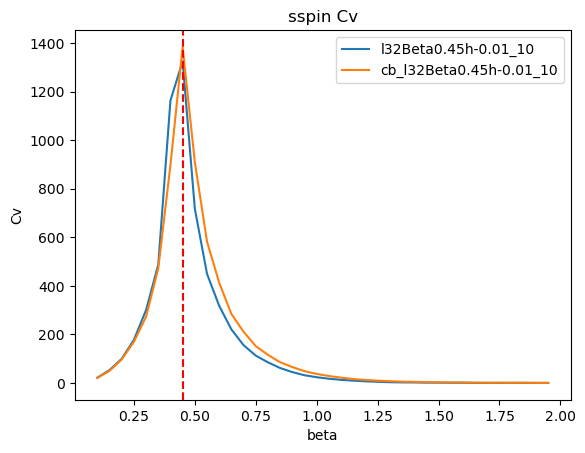

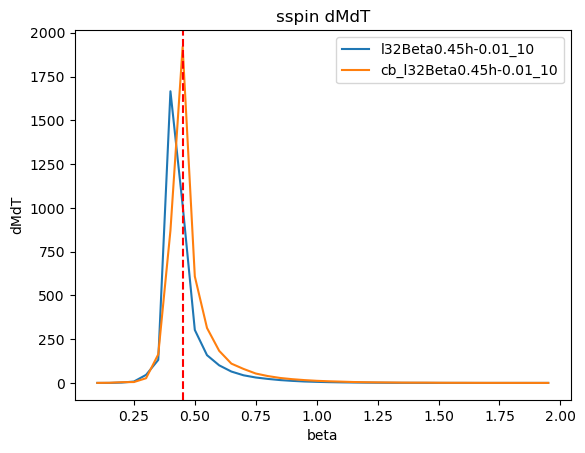

In [6]:
print(ising_cb_index:=np.argmin(np.abs(np.array(l32ising_cb_cv)-max(l32ising_cb_cv))))
print(betas[ising_cb_index])

plt.plot(betas,l32ising_cv,label=f'{n}')
plt.plot(betas,l32ising_cb_cv,label=f'cb_{n}')
plt.xlabel('beta')
plt.ylabel('Cv')
plt.title('sspin Cv')
plt.axvline(betas[ising_index],color = 'r',ls='--')
plt.legend()
plt.figure()

plt.plot(betas,l32ising_dMdT,label=f'{n}')
plt.plot(betas,l32ising_cb_dMdT,label=f'cb_{n}')
plt.xlabel('beta')
plt.ylabel('dMdT')
plt.title('sspin dMdT')
plt.axvline(betas[ising_index],color = 'r',ls='--')
plt.legend()

In [27]:
betas=np.linspace(0.1,1.95,38)
beta_cri=0.45
field=-0.01
linear_size=16

l16ising_Mlist=[]
l16ising_Elist=[]
l16ising_E2list=[]
l16ising_MElist=[]
l16ising_New_Mlist=[]
l16ising_aC_list=[]
l16ising_aC3_list=[]
l16ising_aC4_list=[]
l16ising_draw_list3=[]
l16ising_draw_list4=[]
l16ising_cv=[]
l16ising_dMdT=[]

n=f'l{linear_size:.04g}Beta{beta_cri:.04g}h{field:.04g}_10'

static_file=f'selection_mc/aC3/statics_{n}.h5'
for beta in betas:
    filename=f'selection_mc/aC3/statics_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        E=list(f['E'][:])
        E2=list(f['E2'][:])
        ME=list(f['ME'][:])
        M=list(f['Mtotal'][:])
        
        l16ising_Elist.append(f['E'][()])
        l16ising_E2list.append(f['E2'][()])
        l16ising_MElist.append(f['ME'][()])
        l16ising_Mlist.append(f['Mtotal'][()])

        l16ising_draw_list3.append(f['draw_list3'][()])
        l16ising_draw_list4.append(f['draw_list4'][()])
        
        l16ising_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
        l16ising_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
    filename=f'selection_mc/aC3/subsample_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}_10.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        l16ising_aC_list.append(f['c'][()])
        l16ising_aC3_list.append(f['aC3'][()])
        l16ising_aC4_list.append(f['aC4'][()])

# data = np.load(f'blresult/aC3/blresult_{n}.npz',allow_pickle=True)
# # lst = data.files
# # print(lst)
# # for item in lst:
# #     # print(item)
# #     print(data[item])w
# state=data['state'][()]
# h=state['hjbest'][:64]
# j=state['hjbest'][64:]



# filename=f'input/aC3/input_file_{n}.h5'
# with h5py.File(filename, "w") as f:
# # f.create_dataset('h',data=h)
# # f.create_dataset('j',data=j)
#     f['h']=h
#     f['j']=j
#     f['draw_list3']=l32ising_draw_list3[0]
#     f['draw_list4']=l32ising_draw_list4[0]
# error=data['error'][()]
# plt.plot(error['mses'])
# plt.title(f'{filename}')
# plt.xlabel('time')
# plt.ylabel('error')

# plt.yscale('log')
# plt.xscale('log')

# l32sspin_aC=[]
# l32sspin_cv=[]
# l32sspin_dMdT=[]
# l32sspin_aC3=[]
# l32sspin_aC4=[]
# sspin_config2_allh001=[]
# print(filename)
# niter=100000

# for beta in betas:
#     prmf=filename
#     datf = f'output/aC3/output_{n}.h5'
#     system(f'nice -n +20 ./sspin2 {prmf} {datf} {niter} --beta={beta:.03g}')
#     with h5py.File(datf, "r") as f:
#         E = f['result1']['aE'][()]
        # E2 =f['result1']['aE2'][()]
        # M=f['result1']['aM'][()]
        # M2=f['result1']['aM2'][()]
        # ME=f['result1']['aME'][()]
        # aC=f['result1']['aC'][()]
        # aC3=f['result1']['aC3'][()]
        # aC4=f['result1']['aC4'][()]

        # cnt=f['result1']['cnt'][()]
        # # print(E)
        # l32sspin_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
        # l32sspin_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
        # l32sspin_aC.append(aC)
        # l32sspin_aC3.append(aC3)
        # l32sspin_aC4.append(aC4)

In [28]:
l16ising_cb_Mlist=[]
l16ising_cb_Elist=[]
l16ising_cb_E2list=[]
l16ising_cb_MElist=[]
l16ising_cb_New_Mlist=[]
l16ising_cb_aC_list=[]
l16ising_cb_aC3_list=[]
l16ising_cb_aC4_list=[]
l16ising_cb_draw_list3=[]
l16ising_cb_draw_list4=[]
l16ising_cb_cv=[]
l16ising_cb_dMdT=[]

linear_size=16

n=f'l{linear_size:.04g}Beta{beta_cri:.04g}h{field:.04g}_10'

static_file=f'selection_mc/cb/cb_statics_{n}.h5'
for beta in betas:
    filename=f'selection_mc/cb/cb_statics_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        E=list(f['E'][:])
        E2=list(f['E2'][:])
        ME=list(f['ME'][:])
        M=list(f['Mtotal'][:])
        
        l16ising_cb_Elist.append(f['E'][()])
        l16ising_cb_E2list.append(f['E2'][()])
        l16ising_cb_MElist.append(f['ME'][()])
        l16ising_cb_Mlist.append(f['Mtotal'][()])

        l16ising_cb_draw_list3.append(f['draw_list3'][()])
        l16ising_cb_draw_list4.append(f['draw_list4'][()])
        
        l16ising_cb_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
        l16ising_cb_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
    filename=f'selection_mc/cb/cb_subsample_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}_10.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        l16ising_cb_aC_list.append(f['c'][()])
        l16ising_cb_aC3_list.append(f['aC3'][()])
        l16ising_cb_aC4_list.append(f['aC4'][()])

# data = np.load(f'blresult/cb/cb_blresult_{n}.npz',allow_pickle=True)
# # lst = data.files
# # print(lst)
# # for item in lst:
# #     # print(item)
# #     print(data[item])w
# state=data['state'][()]
# h=state['hjbest'][:64]
# j=state['hjbest'][64:]



# filename=f'input/cb/input_cb_{n}.h5'
# with h5py.File(filename, "w") as f:
# # f.create_dataset('h',data=h)
# # f.create_dataset('j',data=j)
#     f['h']=h
#     f['j']=j
#     f['draw_list3']=l16ising_cb_draw_list3[0]
#     f['draw_list4']=l16ising_cb_draw_list4[0]
# error=data['error'][()]
# plt.plot(error['mses'])
# plt.title(f'{filename}')
# plt.xlabel('time')
# plt.ylabel('error')

# plt.yscale('log')
# plt.xscale('log')

# l16sspin_cb_aC=[]
# l16sspin_cb_cv=[]
# l16sspin_cb_dMdT=[]
# l16sspin_cb_aC3=[]
# l16sspin_cb_aC4=[]
# # sspin_config2_allh001=[]
# # print(filename)
# niter=100000

# for beta in betas:
#     prmf=filename
#     datf = f'output/cb/output_cb_{n}.h5'
#     system(f'nice -n +20 ./sspin2 {prmf} {datf} {niter} --beta={beta:.03g}')
#     with h5py.File(datf, "r") as f:
#         E = f['result1']['aE'][()]
#         E2 =f['result1']['aE2'][()]
#         M=f['result1']['aM'][()]
#         M2=f['result1']['aM2'][()]
#         ME=f['result1']['aME'][()]
#         aC=f['result1']['aC'][()]
#         aC3=f['result1']['aC3'][()]
#         aC4=f['result1']['aC4'][()]

        # cnt=f['result1']['cnt'][()]
        # # print(E)
        # l16sspin_cb_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
        # l16sspin_cb_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
        # l16sspin_cb_aC.append(aC)
        # l16sspin_cb_aC3.append(aC3)
        # l16sspin_cb_aC4.append(aC4)

7
7


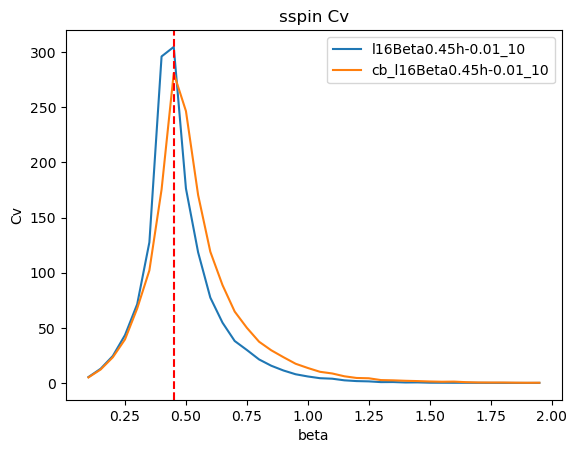

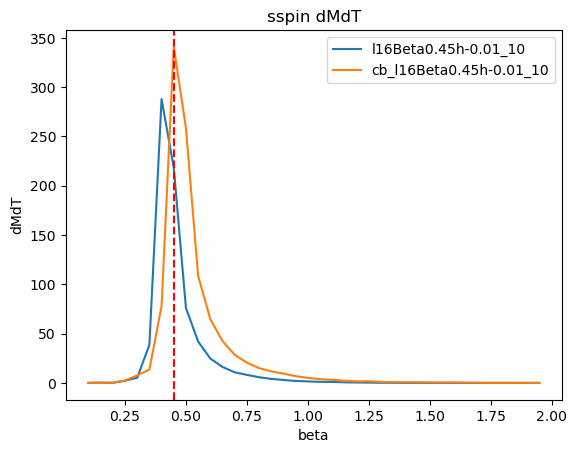

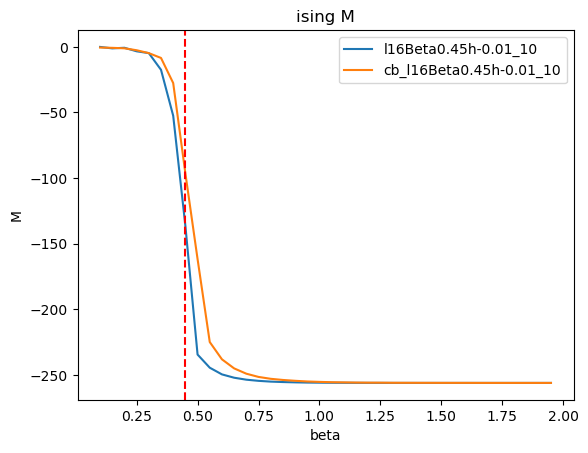

In [31]:
print(l16ising_cb_index:=np.argmin(np.abs(np.array(l16ising_cb_cv)-max(l16ising_cb_cv))))
print(l16ising_index:=np.argmin(np.abs(np.array(l16ising_cv)-max(l16ising_cv))))
# print(betas[ising_cb_index])

plt.plot(betas,l16ising_cv,label=f'{n}')
plt.plot(betas,l16ising_cb_cv,label=f'cb_{n}')
plt.xlabel('beta')
plt.ylabel('Cv')
plt.title('sspin Cv')
plt.axvline(betas[l16ising_index],color = 'r',ls='--')
plt.legend()
plt.figure()

plt.plot(betas,l16ising_dMdT,label=f'{n}')
plt.plot(betas,l16ising_cb_dMdT,label=f'cb_{n}')
plt.xlabel('beta')
plt.ylabel('dMdT')
plt.title('sspin dMdT')
plt.axvline(betas[l16ising_cb_index],color = 'r',ls='--')
plt.legend()
plt.figure()


plt.plot(betas,l16ising_Mlist,label=f'{n}')
plt.plot(betas,l16ising_cb_Mlist,label=f'cb_{n}')
plt.xlabel('beta')
plt.ylabel('M')
plt.title('ising M')
plt.axvline(betas[l16ising_cb_index],color = 'r',ls='--')
plt.legend()

In [34]:
betas=np.linspace(0.1,1.95,38)
beta_cri=0.45
field=-0.01
linear_size=8

l8ising_Mlist=[]
l8ising_Elist=[]
l8ising_E2list=[]
l8ising_MElist=[]
l8ising_New_Mlist=[]
l8ising_aC_list=[]
l8ising_aC3_list=[]
l8ising_aC4_list=[]
l8ising_draw_list3=[]
l8ising_draw_list4=[]
l8ising_cv=[]
l8ising_dMdT=[]

n=f'l{linear_size:.04g}Beta{beta_cri:.04g}h{field:.04g}_10'

static_file=f'selection_mc/aC3/statics_{n}.h5'
for beta in betas:
    filename=f'selection_mc/aC3/statics_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        E=list(f['E'][:])
        E2=list(f['E2'][:])
        ME=list(f['ME'][:])
        M=list(f['Mtotal'][:])
        
        l8ising_Elist.append(E[0])
        l8ising_E2list.append(E2[0])
        l8ising_MElist.append(ME[0])
        l8ising_Mlist.append(M[0])

        l8ising_draw_list3.append(f['draw_list3'][()])
        l8ising_draw_list4.append(f['draw_list4'][()])
        
        l8ising_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
        l8ising_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
    filename=f'selection_mc/aC3/subsample_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}_10.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        l8ising_aC_list.append(f['c'][()])
        l8ising_aC3_list.append(f['aC3'][()])
        l8ising_aC4_list.append(f['aC4'][()])


In [33]:
l8ising_cb_Mlist=[]
l8ising_cb_Elist=[]
l8ising_cb_E2list=[]
l8ising_cb_MElist=[]
l8ising_cb_New_Mlist=[]
l8ising_cb_aC_list=[]
l8ising_cb_aC3_list=[]
l8ising_cb_aC4_list=[]
l8ising_cb_draw_list3=[]
l8ising_cb_draw_list4=[]
l8ising_cb_cv=[]
l8ising_cb_dMdT=[]

linear_size=8

n=f'l{linear_size:.04g}Beta{beta_cri:.04g}h{field:.04g}_10'

static_file=f'selection_mc/cb/cb_statics_{n}.h5'
for beta in betas:
    filename=f'selection_mc/cb/cb_statics_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        E=list(f['E'][:])
        E2=list(f['E2'][:])
        ME=list(f['ME'][:])
        M=list(f['Mtotal'][:])
        
        l8ising_cb_Elist.append(E[0])
        l8ising_cb_E2list.append(E2[0])
        l8ising_cb_MElist.append(ME[0])
        l8ising_cb_Mlist.append(M[0])

        l8ising_cb_draw_list3.append(f['draw_list3'][()])
        l8ising_cb_draw_list4.append(f['draw_list4'][()])
        
        l8ising_cb_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
        l8ising_cb_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
    filename=f'selection_mc/cb/cb_subsample_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}_10.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        l8ising_cb_aC_list.append(f['c'][()])
        l8ising_cb_aC3_list.append(f['aC3'][()])
        l8ising_cb_aC4_list.append(f['aC4'][()])


8
6
0.5


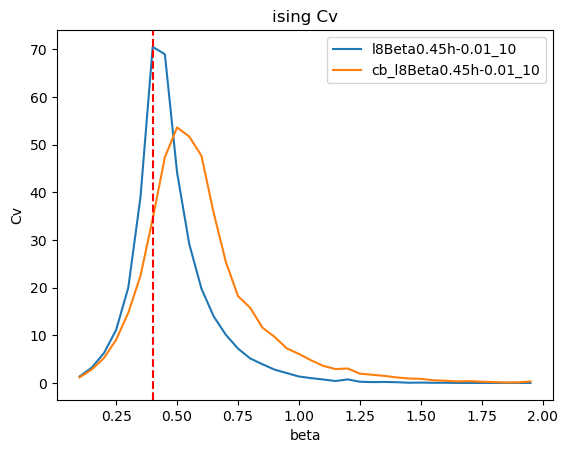

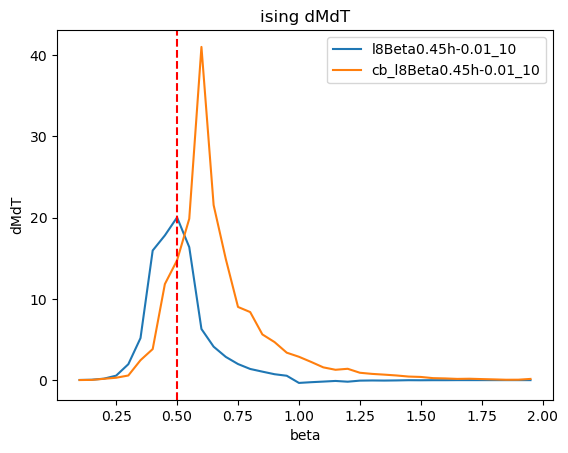

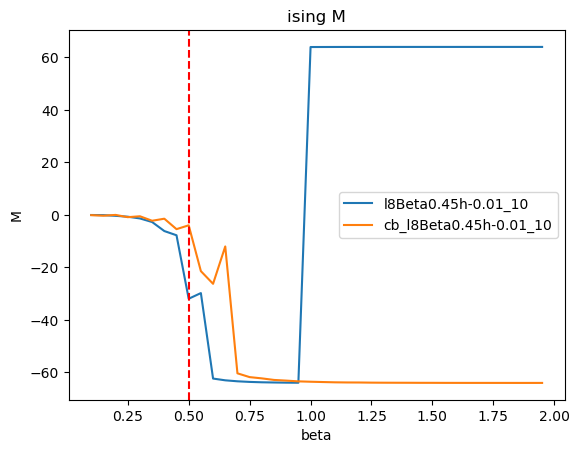

In [35]:
print(l8ising_cb_index:=np.argmin(np.abs(np.array(l8ising_cb_cv)-max(l8ising_cb_cv))))
print(l8ising_index:=np.argmin(np.abs(np.array(l8ising_cv)-max(l8ising_cv))))
print(betas[l8ising_cb_index])

plt.plot(betas,l8ising_cv,label=f'{n}')
plt.plot(betas,l8ising_cb_cv,label=f'cb_{n}')
plt.xlabel('beta')
plt.ylabel('Cv')
plt.title('ising Cv')
plt.axvline(betas[l8ising_index],color = 'r',ls='--')
plt.legend()
plt.figure()

plt.plot(betas,l8ising_dMdT,label=f'{n}')
plt.plot(betas,l8ising_cb_dMdT,label=f'cb_{n}')
plt.xlabel('beta')
plt.ylabel('dMdT')
plt.title('ising dMdT')
plt.axvline(betas[l8ising_cb_index],color = 'r',ls='--')
plt.legend()
plt.figure()

plt.plot(betas,l8ising_Mlist,label=f'{n}')
plt.plot(betas,l8ising_cb_Mlist,label=f'cb_{n}')
plt.xlabel('beta')
plt.ylabel('M')
plt.title('ising M')
plt.axvline(betas[l8ising_cb_index],color = 'r',ls='--')
plt.legend()

19
1.05


<Figure size 640x480 with 0 Axes>

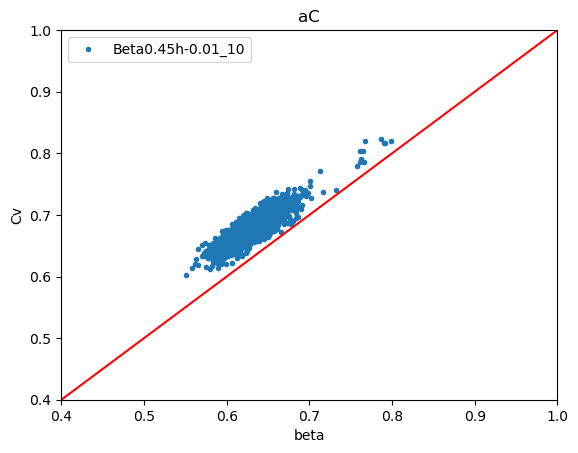

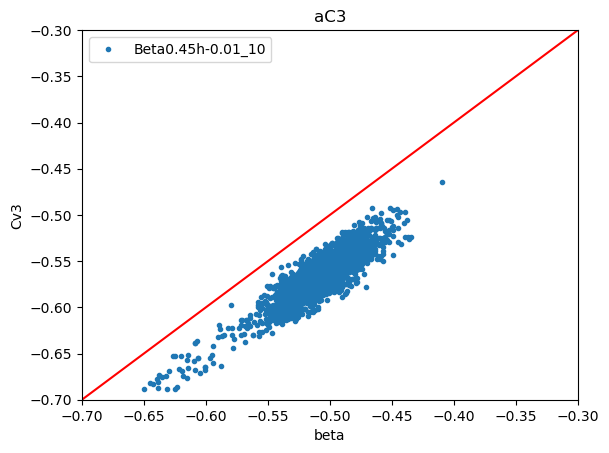

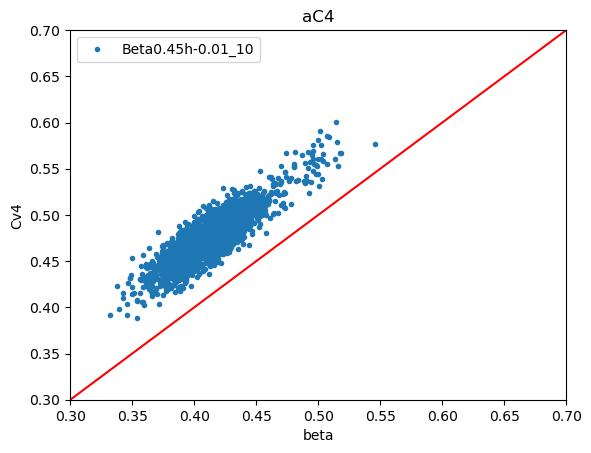

<Figure size 640x480 with 0 Axes>

In [7]:
print(sspin_index:=np.argmin(np.abs(np.array(l32sspin_cv)-max(l32sspin_cv))))
print(betas[sspin_index])
# newsspin_aC=[x/10000 for x in l32sspin_aC[sspin_index]]
# newsspin_aC3=[x/10000 for x in l32sspin_aC3[sspin_index]]
# newsspin_aC4=[x/10000 for x in l32sspin_aC4[sspin_index]]
x=np.linspace(-100,100,100)
# print(np.array(l32ising_aC_list[beta_index]).shape)
plt.plot(l32ising_aC_list[ising_index],l32sspin_aC[sspin_index],'.',label=f'Beta0.45h-0.01_10',)
plt.plot(x,x,color='r')
plt.ylim(0.4, 1)
plt.xlim(0.4, 1)
plt.xlabel('beta')
plt.ylabel('Cv')
plt.title('aC')
plt.legend()
plt.figure()

plt.plot(l32ising_aC3_list[ising_index],l32sspin_aC3[sspin_index],'.',label=f'Beta0.45h-0.01_10',)
plt.plot(x,x,color='r')
plt.ylim(-0.7, -0.3)
plt.xlim(-0.7, -0.3)
plt.xlabel('beta')
plt.ylabel('Cv3')
plt.title('aC3')
plt.legend()
plt.figure()

plt.plot(l32ising_aC4_list[ising_index],l32sspin_aC4[sspin_index],'.',label=f'Beta0.45h-0.01_10',)
plt.plot(x,x,color='r')
plt.ylim(0.3, 0.7)
plt.xlim(0.3, 0.7)
plt.xlabel('beta')
plt.ylabel('Cv4')
plt.title('aC4')
plt.legend()
plt.figure()

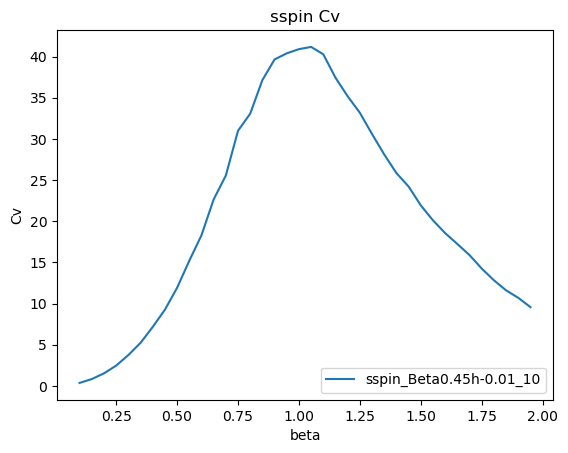

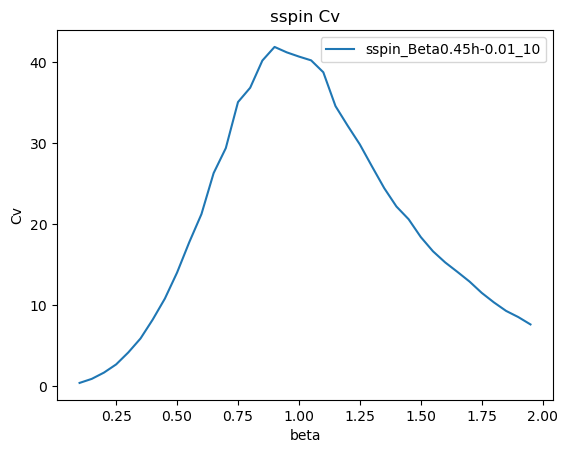

In [14]:
# plt.plot(betas,l32ising_cv,label=f'ising_Beta0.45h-0.01_10')
plt.plot(betas,l32sspin_cv,label=f'sspin_Beta0.45h-0.01_10')
plt.xlabel('beta')
plt.ylabel('Cv')
plt.title('sspin Cv')
# plt.axvline(betas[beta_index],color = 'r',ls='--')
plt.legend()
plt.figure()

plt.plot(betas,l32sspin_dMdT,label=f'sspin_Beta0.45h-0.01_10')
plt.xlabel('beta')
plt.ylabel('dMdT')
plt.title('sspin dMdT')
# plt.axvline(betas[beta_index],color = 'r',ls='--')
plt.legend()

16
6
17
6
17
6


/tmp/ipykernel_3857144/2222006533.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


17
6
17
7
17
7
18
7
16
7
15
7
18
7
19
7
17
7


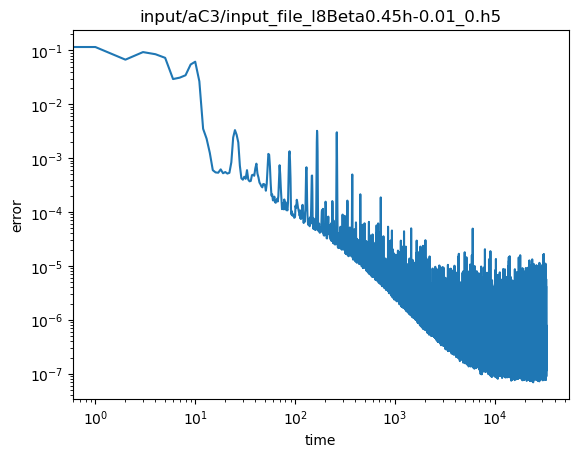

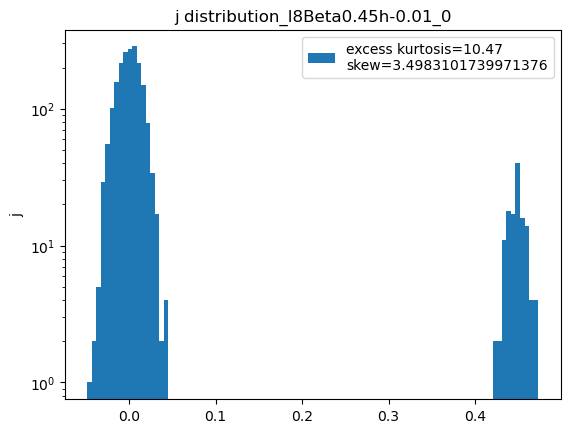

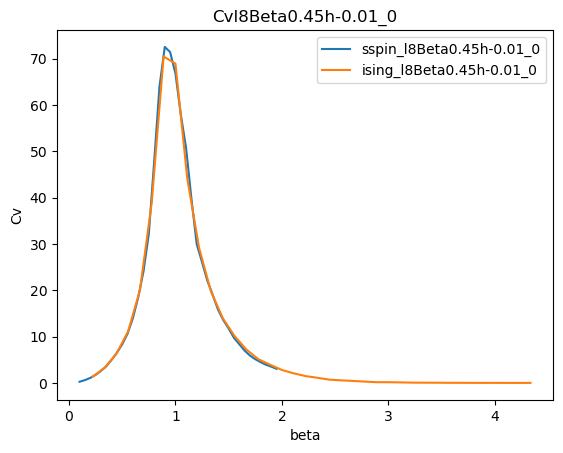

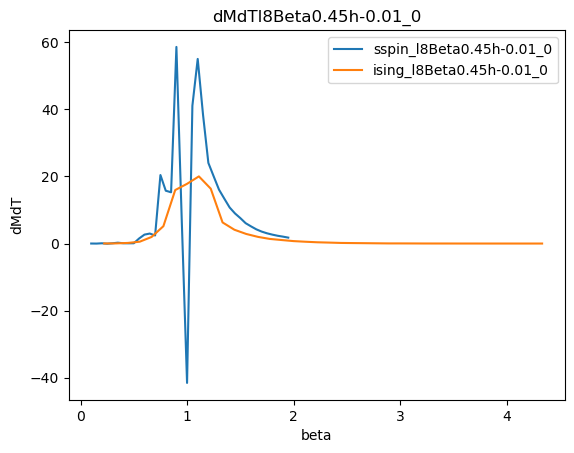

<Figure size 640x480 with 0 Axes>

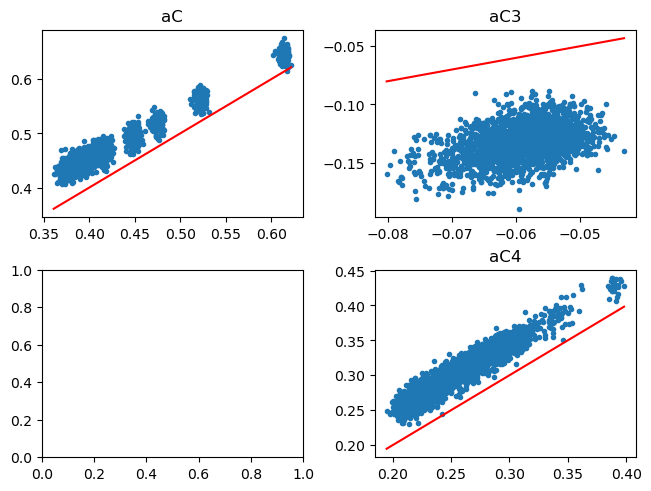

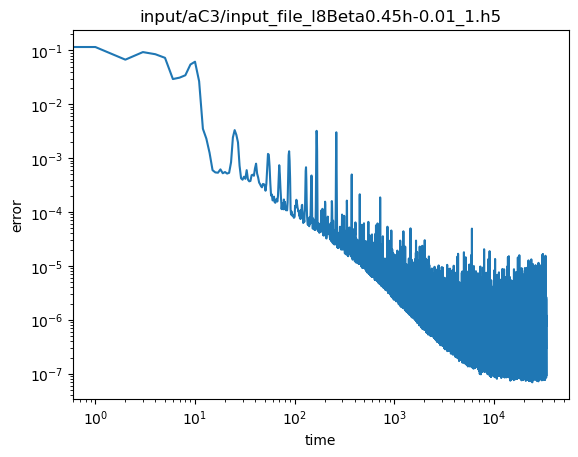

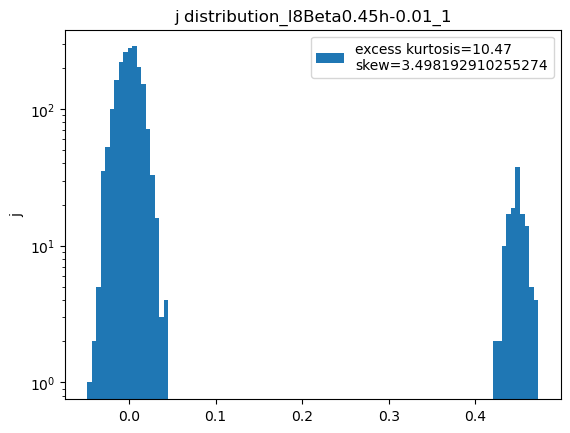

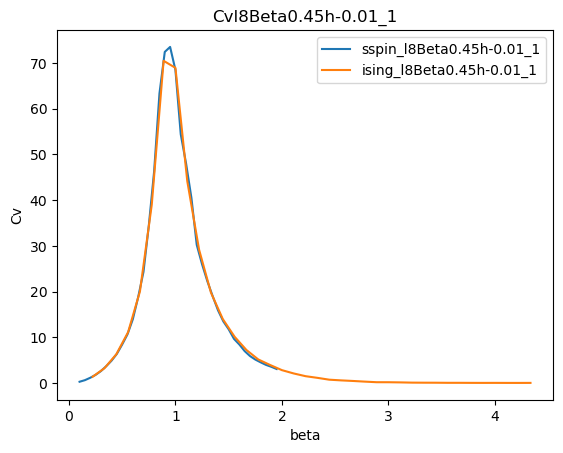

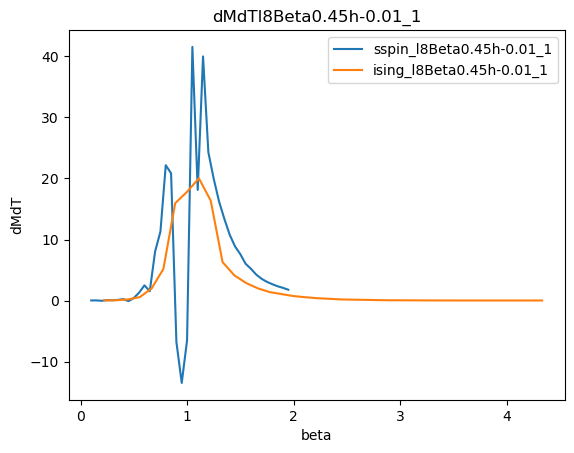

<Figure size 640x480 with 0 Axes>

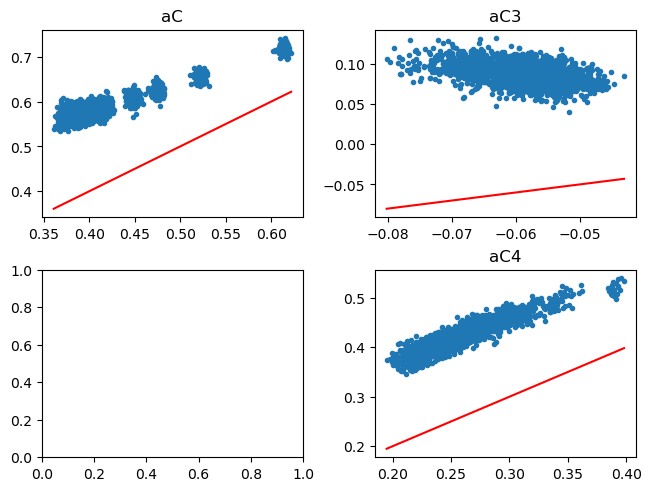

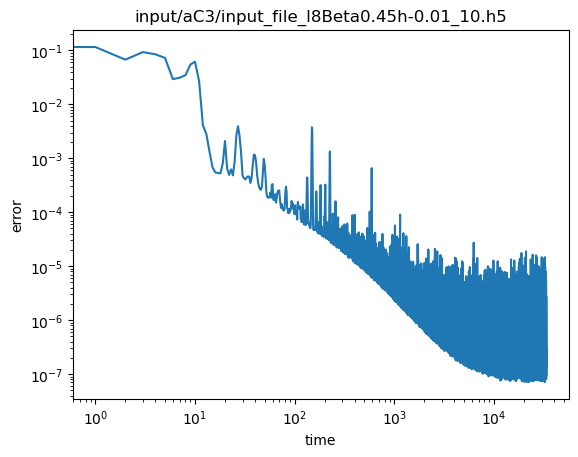

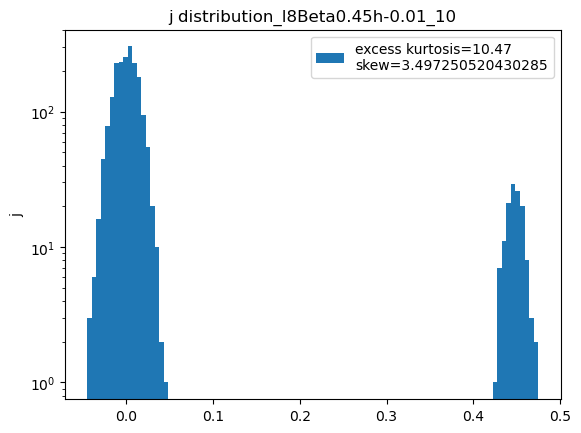

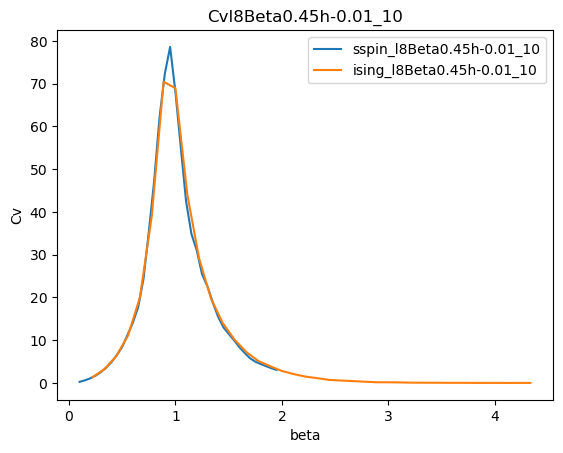

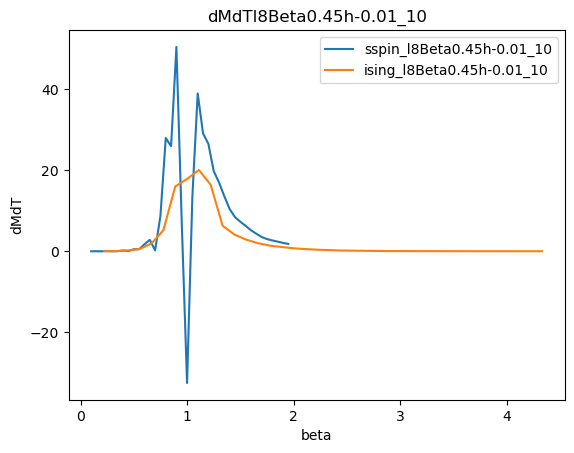

<Figure size 640x480 with 0 Axes>

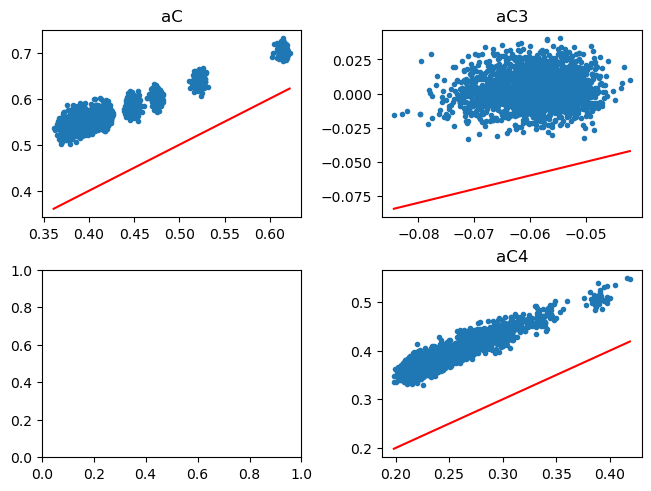

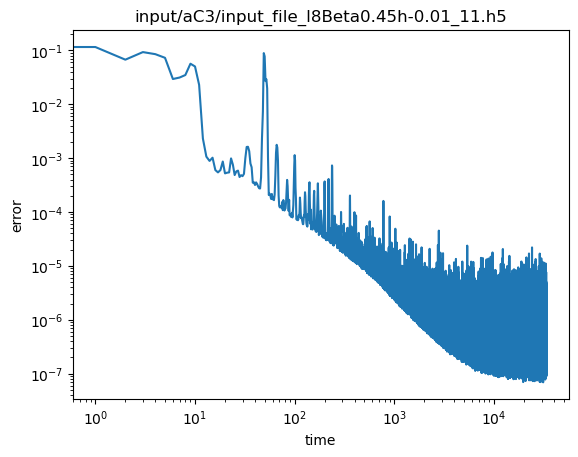

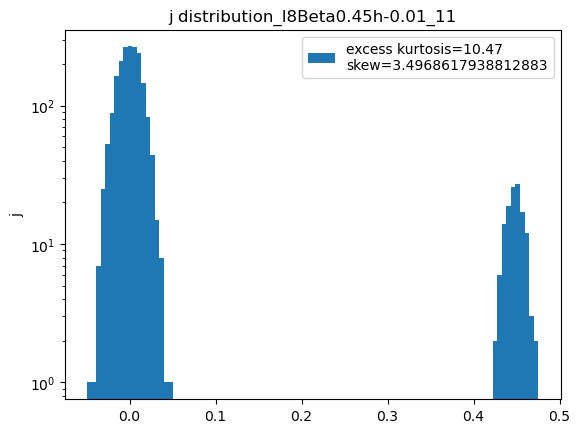

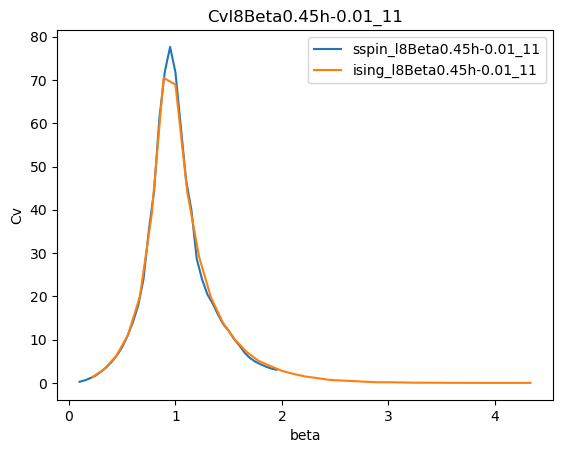

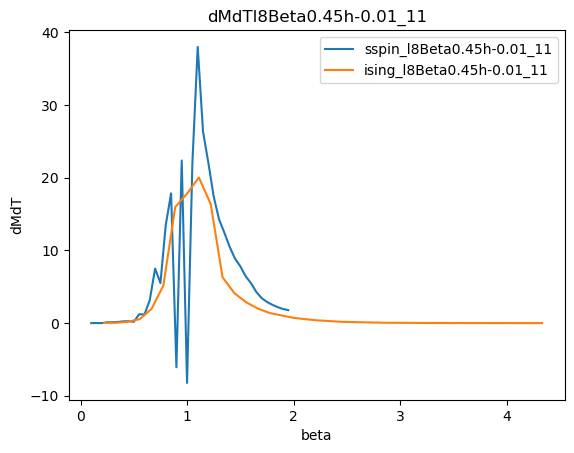

<Figure size 640x480 with 0 Axes>

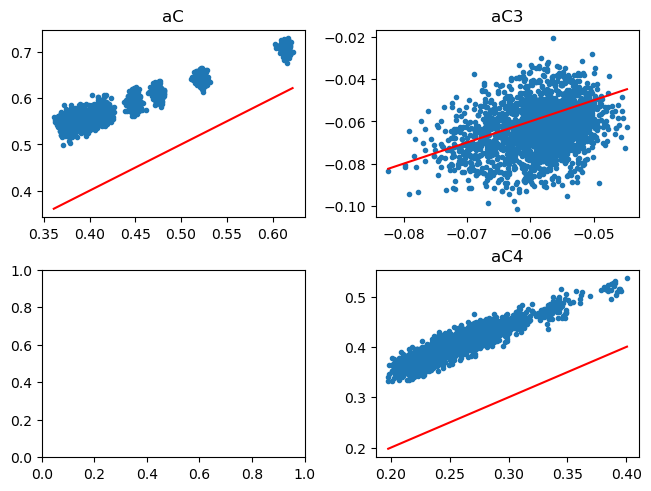

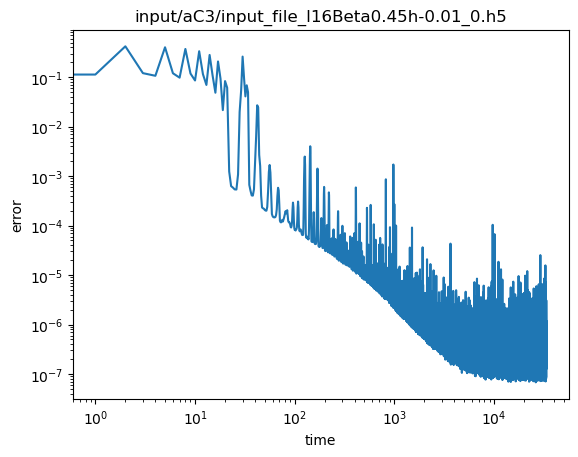

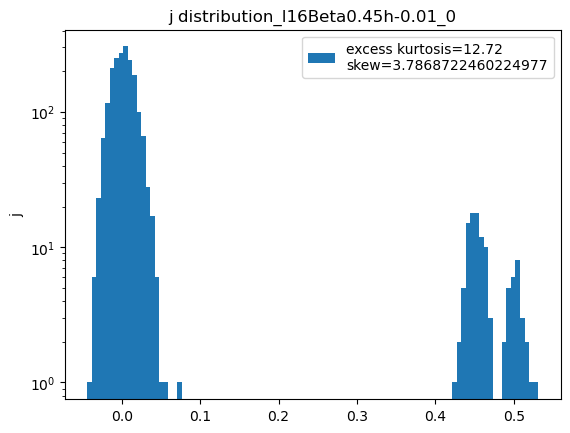

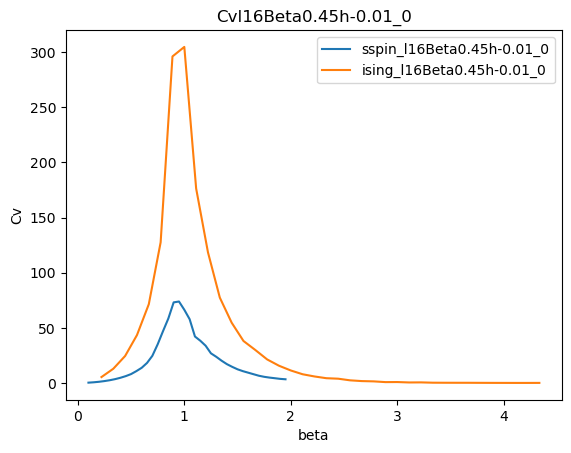

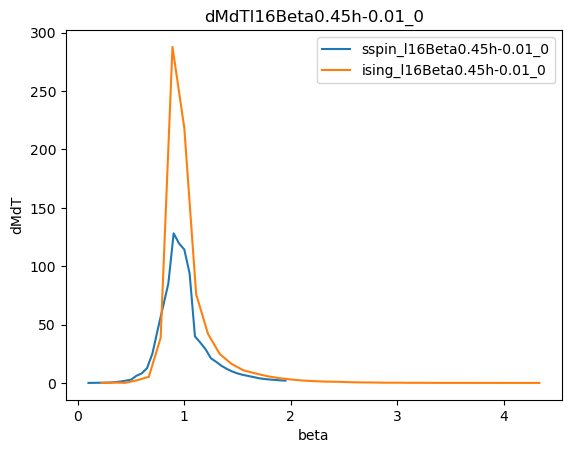

<Figure size 640x480 with 0 Axes>

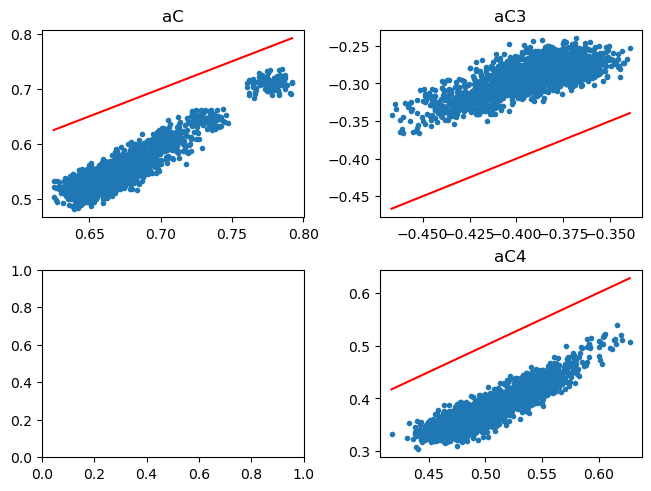

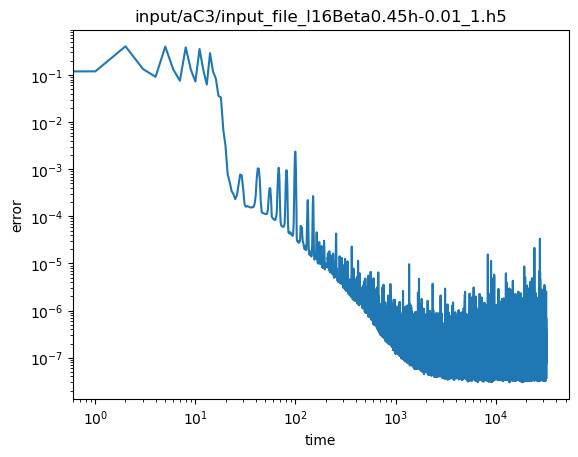

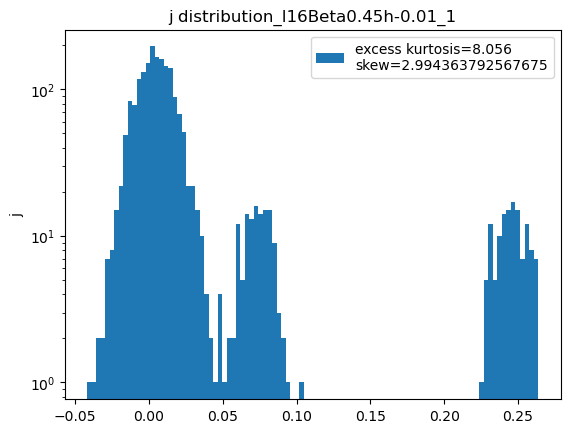

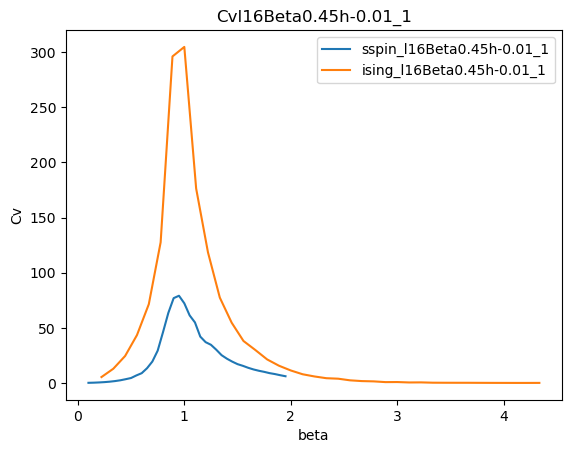

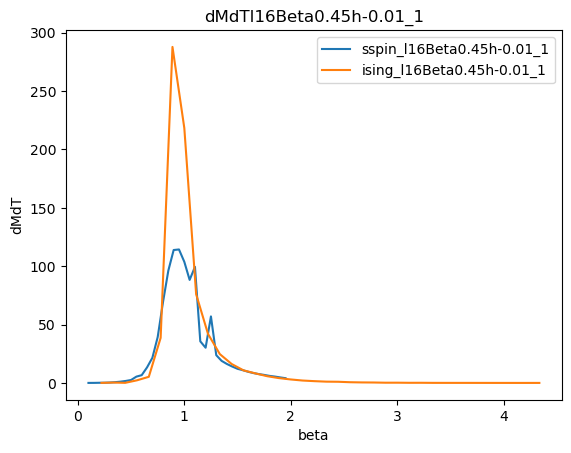

<Figure size 640x480 with 0 Axes>

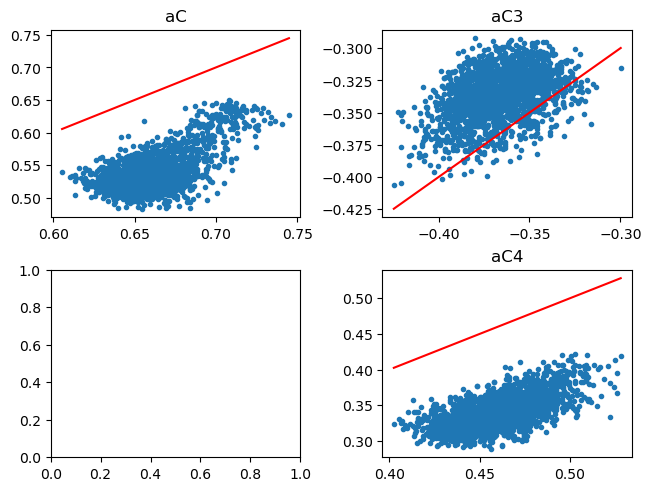

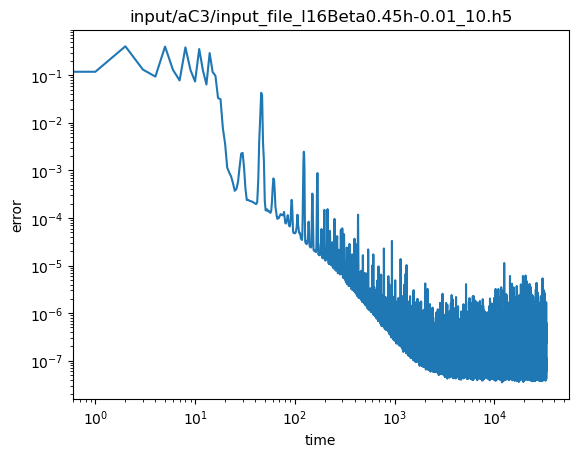

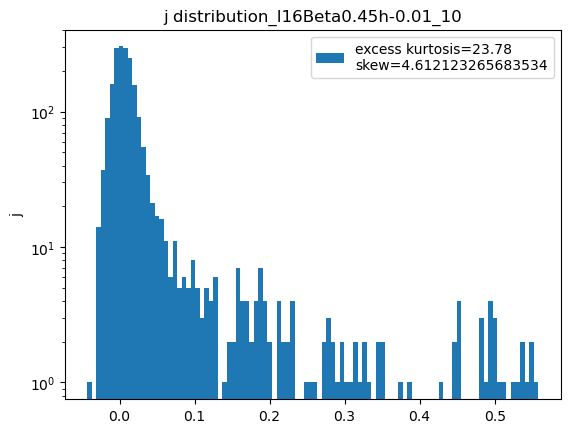

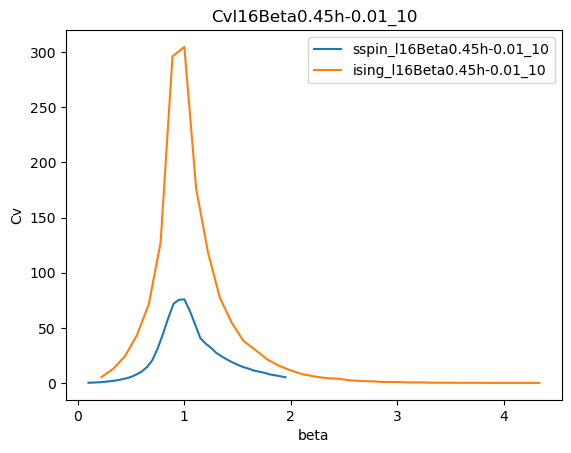

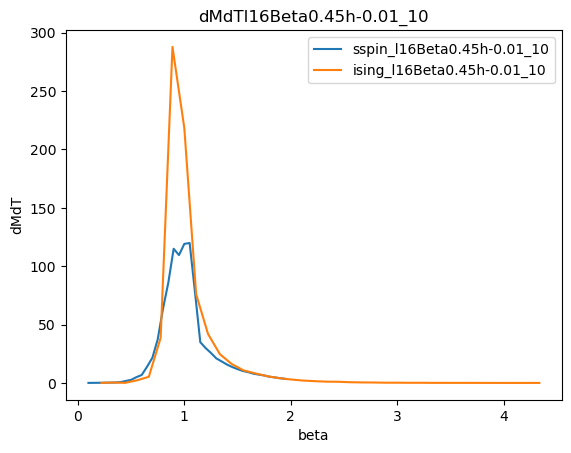

<Figure size 640x480 with 0 Axes>

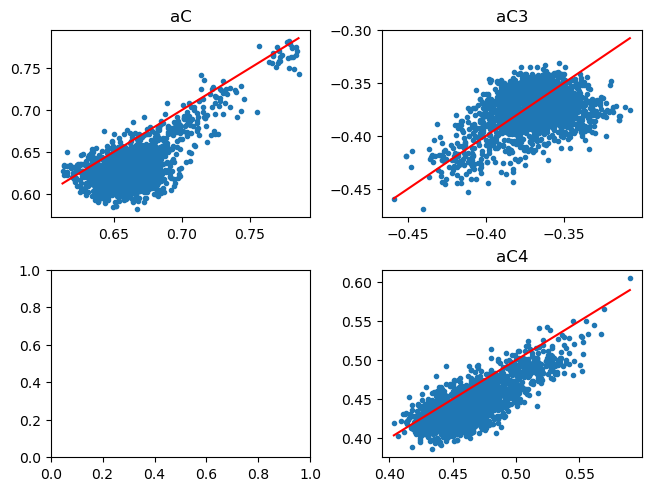

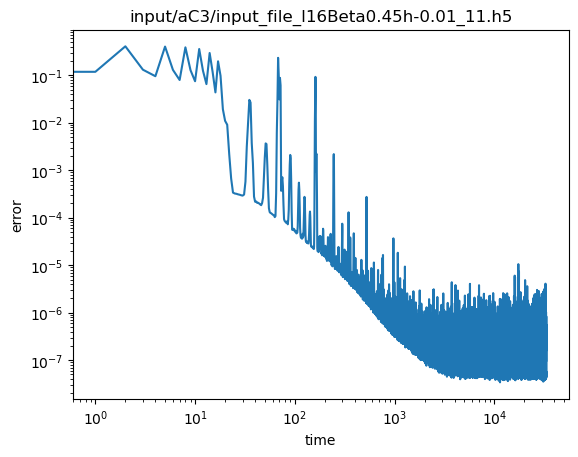

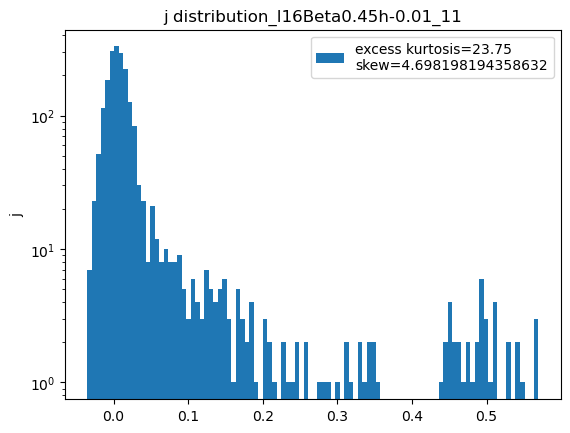

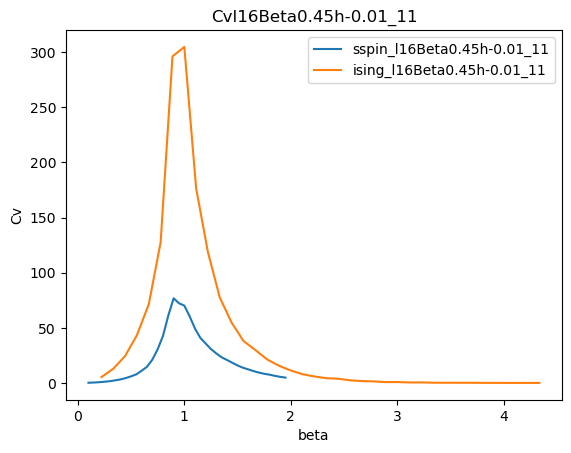

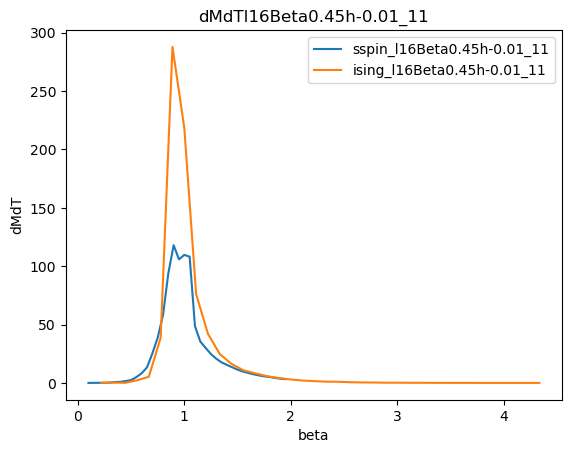

<Figure size 640x480 with 0 Axes>

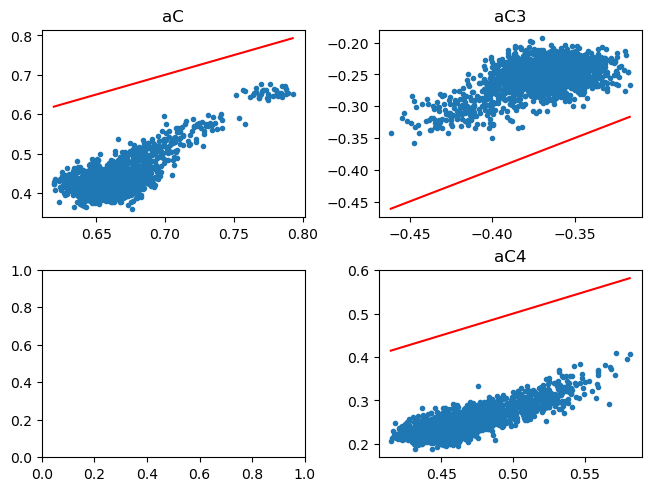

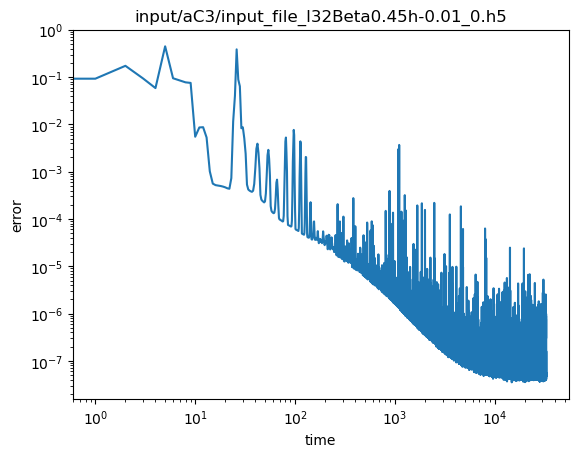

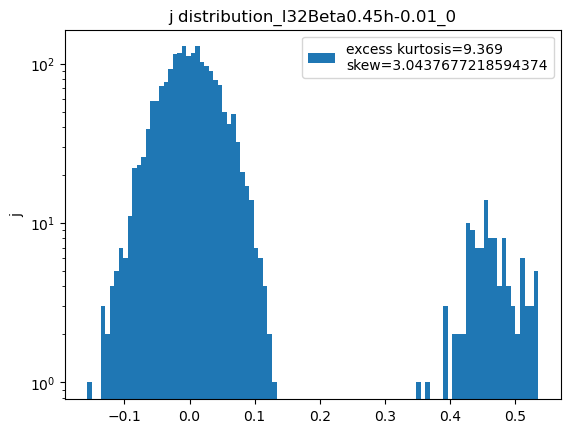

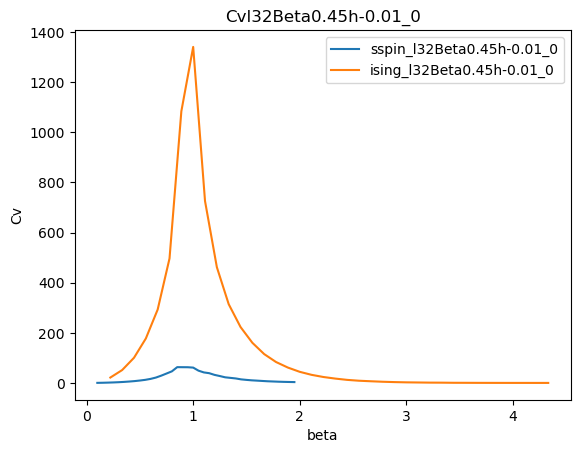

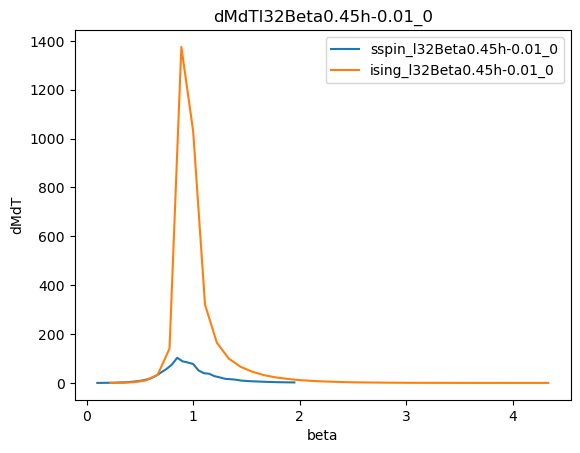

<Figure size 640x480 with 0 Axes>

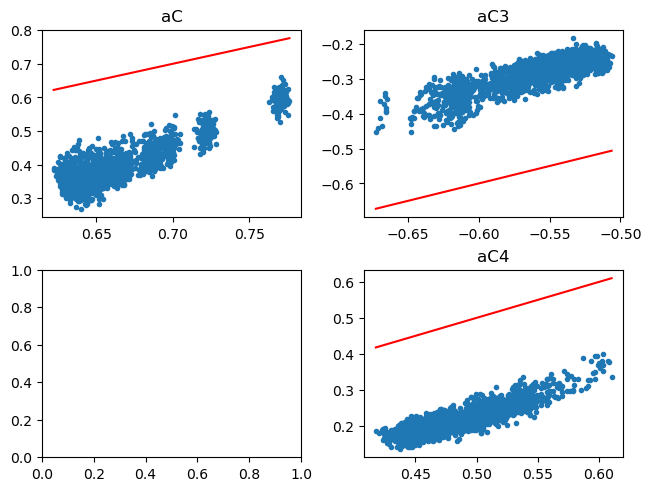

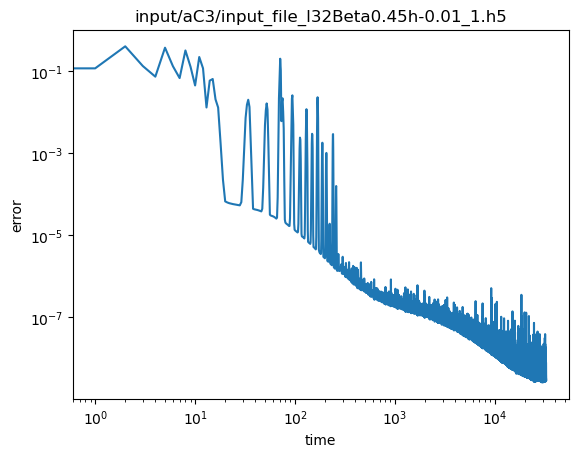

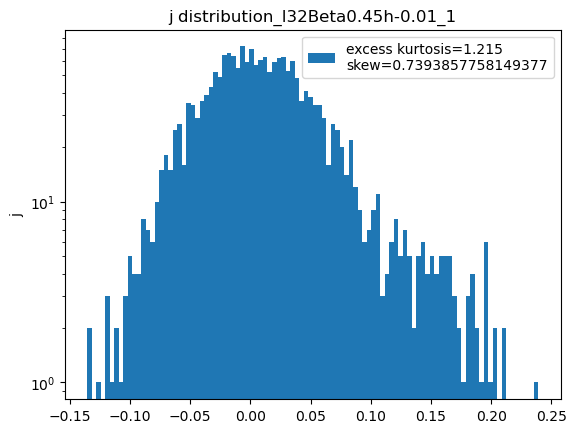

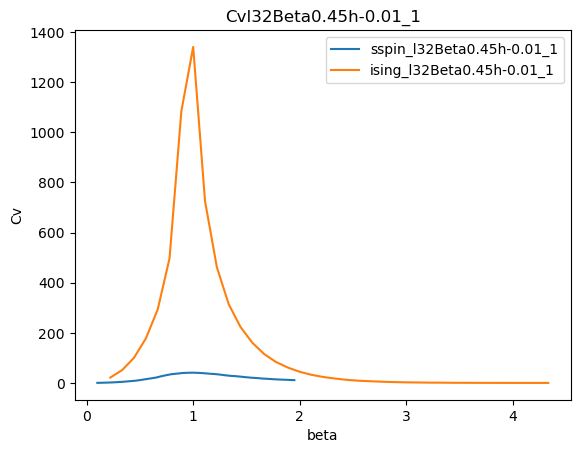

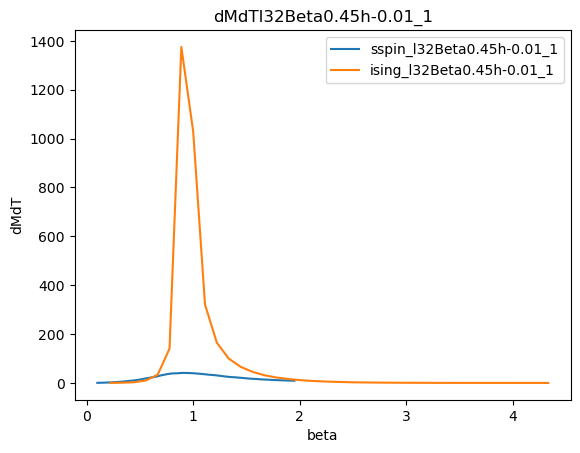

<Figure size 640x480 with 0 Axes>

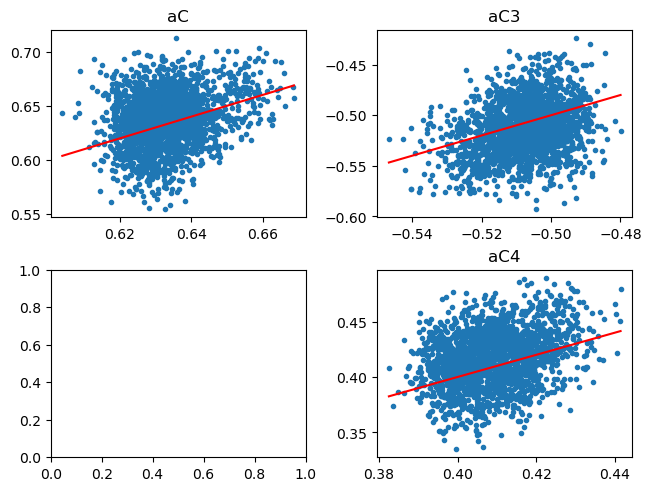

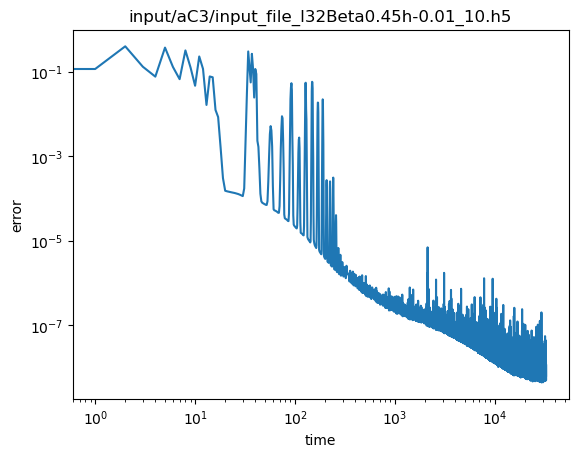

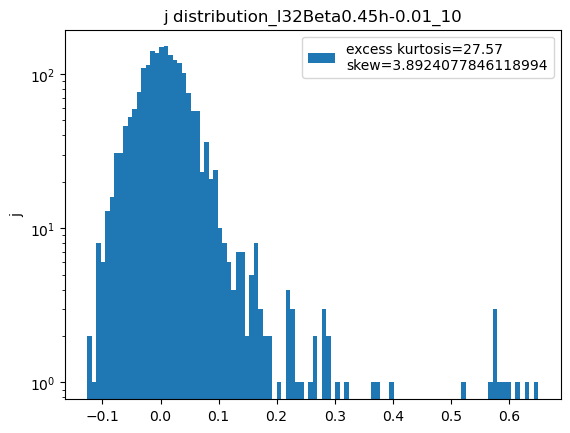

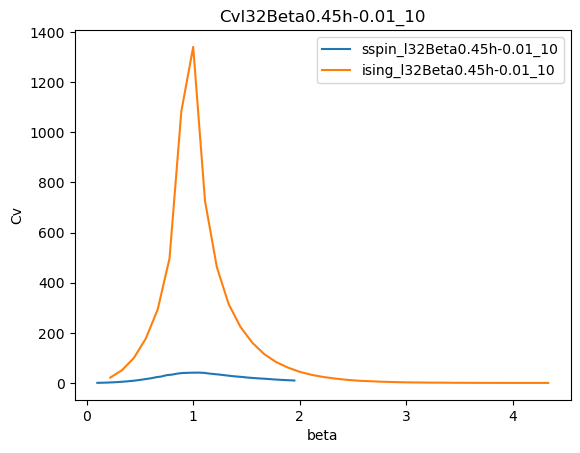

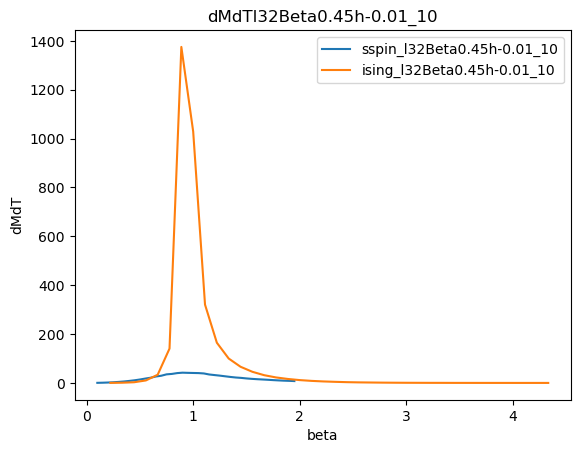

<Figure size 640x480 with 0 Axes>

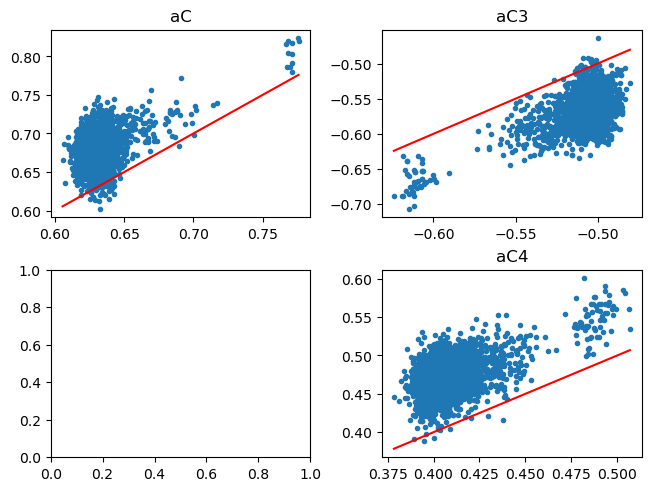

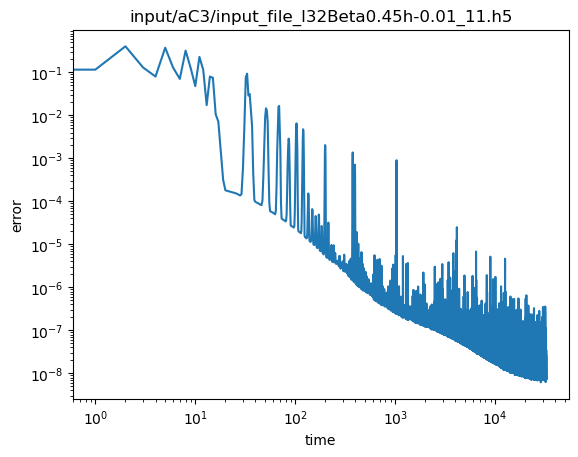

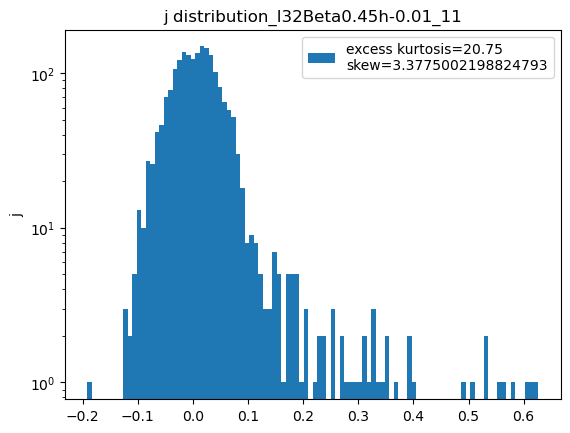

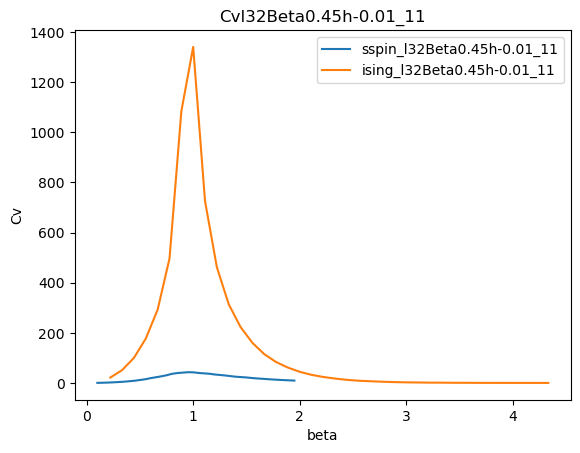

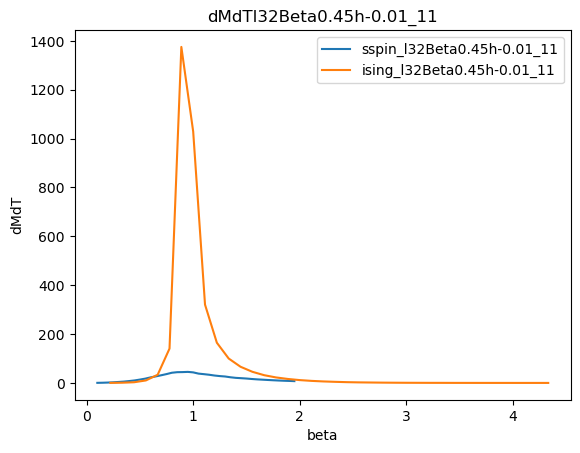

<Figure size 640x480 with 0 Axes>

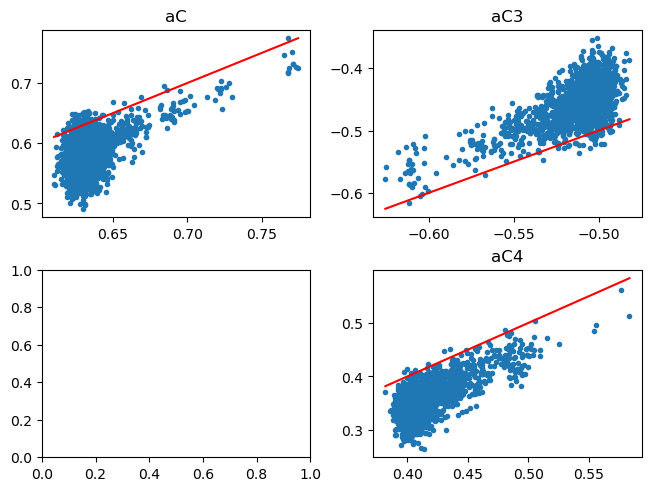

<Figure size 640x480 with 0 Axes>

In [37]:
betas=np.linspace(0.1,1.95,38)
betas_ising=[m/0.45 for m in betas]
beta_cris=[0.4,0.45,0.5]
field=-0.01
filenumbers=[0,1,10,11]
linear_sizes=[8,16,32]

total_ising_Mlist=[]
total_ising_Elist=[]
total_ising_E2list=[]
total_ising_MElist=[]
total_ising_New_Mlist=[]
total_ising_aC=[]
total_ising_aC3=[]
total_ising_aC4=[]
total_ising_draw_list3=[]
total_ising_draw_list4=[]
total_ising_cv=[]
total_ising_dMdT=[]

total_sspin_aC=[]
total_sspin_cv=[]
total_sspin_dMdT=[]
total_sspin_aC3=[]
total_sspin_aC4=[]

name_list=[]
i=0
for linear_size in linear_sizes:
    for filenumber in filenumbers:
        draw_list3=[]
        draw_list4=[]
        filename=f'selection_mc/aC3/statics_l{linear_size:.03g}Beta{beta_cris[1]:.03g}h{field:.04g}.h5'
        with h5py.File(filename, "r") as f:

            draw_list3.append(f['draw_list3'][()])
            draw_list4.append(f['draw_list4'][()])
        # print(draw_list3)
        n=f'l{linear_size:.04g}Beta{beta_cris[1]:.04g}h{field:.04g}_{filenumber}'
        name_list.append(n)
        for beta in betas:
            filename=f'selection_mc/aC3/statics_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}.h5'
            with h5py.File(filename, "r") as f:
                # print("Keys: %s" % f.keys())
                E=list(f['E'][:])
                E2=list(f['E2'][:])
                ME=list(f['ME'][:])
                M=list(f['Mtotal'][:])
                
                total_ising_Elist.append(f['E'][()])
                total_ising_E2list.append(f['E2'][()])
                total_ising_MElist.append(f['ME'][()])
                total_ising_Mlist.append(f['Mtotal'][()])

                total_ising_draw_list3.append(f['draw_list3'][()])
                total_ising_draw_list4.append(f['draw_list4'][()])
                
                total_ising_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
                total_ising_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
            filename=f'selection_mc/aC3/subsample_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}_{filenumber}.h5'
            with h5py.File(filename, "r") as f:
                # print("Keys: %s" % f.keys())
                total_ising_aC.append(f['c'][()])
                total_ising_aC3.append(f['aC3'][()])
                total_ising_aC4.append(f['aC4'][()])
        


        data = np.load(f'blresult/aC3/blresult_{n}.npz',allow_pickle=True)
        state=data['state'][()]
        h=state['hjbest'][:64]
        j=state['hjbest'][64:]
        


        filename=f'input/aC3/input_file_{n}.h5'

        with h5py.File(filename, "w") as f:
        # f.create_dataset('h',data=h)
        # f.create_dataset('j',data=j)
            f['h']=h
            f['j']=j
            f['draw_list3']=draw_list3[0]
            f['draw_list4']=draw_list4[0]

        error=data['error'][()]
        plt.plot(error['mses'])
        plt.title(f'{filename}')
        plt.xlabel('time')
        plt.ylabel('error')

        plt.yscale('log')
        plt.xscale('log')
        plt.figure()

        plt.hist(j,bins=100,label=f'excess kurtosis={kurtosis(j):.04g}\nskew={skew(j)}')
        plt.ylabel('j')
        plt.yscale('log')
        plt.title(f'j distribution_{n}')
        plt.legend()
        plt.figure()
        # sspin_config2_allh001=[]
        # print(filename)
        niter=10000

        for beta in betas:
            prmf=filename
            datf = f'output/aC3/output_l{linear_size:.04g}Beta{beta:.04g}h{field:.04g}_{filenumber}.h5'
            system(f'nice -n +20 ./sspin2 {prmf} {datf} {niter} --beta={beta:.03g}')
            with h5py.File(datf, "r") as f:
                E = f['result1']['aE'][()]
                E2 =f['result1']['aE2'][()]
                M=f['result1']['aM'][()]
                M2=f['result1']['aM2'][()]
                ME=f['result1']['aME'][()]
                aC=f['result1']['aC'][()]
                aC3=f['result1']['aC3'][()]
                aC4=f['result1']['aC4'][()]

                cnt=f['result1']['cnt'][()]
                # print(E)
                total_sspin_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
                total_sspin_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
                total_sspin_aC.append(aC)
                total_sspin_aC3.append(aC3)
                total_sspin_aC4.append(aC4)

        print(sspin_index:=np.argmin(np.abs(np.array(total_sspin_cv[i*38:(i+1)*38])-max(total_sspin_cv[i*38:(i+1)*38]))))
        print(ising_index:=np.argmin(np.abs(np.array(total_ising_cv[i*38:(i+1)*38])-max(total_ising_cv[i*38:(i+1)*38]))))
        # new_total_sspin_aC=[m/10000 for m in total_sspin_aC[sspin_index][i:i+2000]]
        # new_total_sspin_aC3=[m/10000 for m in total_sspin_aC3[sspin_index][i:i+2000]]
        # new_total_sspin_aC4=[m/10000 for m in total_sspin_aC4[sspin_index][i:i+2000]]
        # new_total_ising_aC_list=total_ising_aC_list[ising_index][i:i+2000]
        # new_total_ising_aC3_list=total_ising_aC3_list[ising_index][i:i+2000]
        # new_total_ising_aC4_list=total_ising_aC4_list[ising_index][i:i+2000]

        plt.plot(betas,total_sspin_cv[i*38:(i+1)*38],label=f'sspin_{n}')
        plt.plot(betas_ising,total_ising_cv[i*38:(i+1)*38],label=f'ising_{n}')
        plt.xlabel('beta')
        plt.ylabel('Cv')
        plt.title(f'Cv{n}')
        plt.legend()
        plt.figure()

        plt.plot(betas,total_sspin_dMdT[i*38:(i+1)*38],label=f'sspin_{n}')
        plt.plot(betas_ising,total_ising_dMdT[i*38:(i+1)*38],label=f'ising_{n}')
        plt.xlabel('beta')
        plt.ylabel('dMdT')
        plt.title(f'dMdT{n}')
        plt.legend()
        plt.figure()
        

        fig, ax = plt.subplots(2,2,constrained_layout = True)
        ax[0,0].set_title('aC')
        ax[0,0].plot(x:=total_ising_aC[ising_index+i*38][:],total_sspin_aC[sspin_index+i*38][:],'.',label=f'sspin_{n}',)
        x=[x.min(), x.max()]
        ax[0,0].plot(x,x,color='r')

        ax[0,1].set_title('aC3')
        ax[0,1].plot(x:=total_ising_aC3[ising_index+i*38][:],total_sspin_aC3[sspin_index+i*38][:],'.',label=f'sspin_{n}')
        x=[x.min(), x.max()]
        ax[0,1].plot(x,x,color='r')
        
        ax[1,1].set_title('aC4')
        ax[1,1].plot(x:=total_ising_aC4[ising_index+i*38][:],total_sspin_aC4[sspin_index+i*38][:],'.',label=f'sspin_{n}')
        x=[x.min(), x.max()]
        ax[1,1].plot(x,x,color='r')
        plt.figure()
        i+=1

19
6
19
6
19
6


/tmp/ipykernel_3706997/3988306313.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


19
6
16
6
17
6
17
6
17
6
13
6
13
6
15
6
15
6


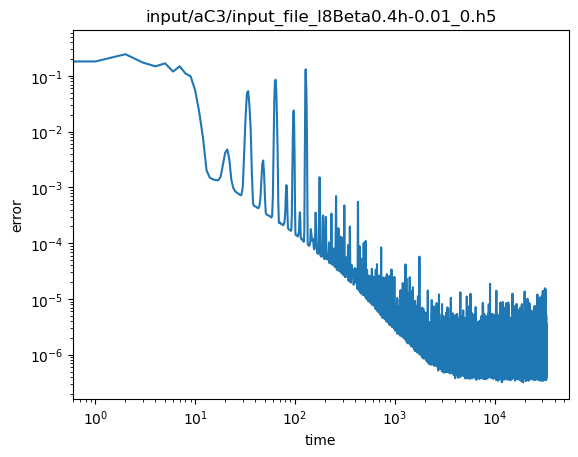

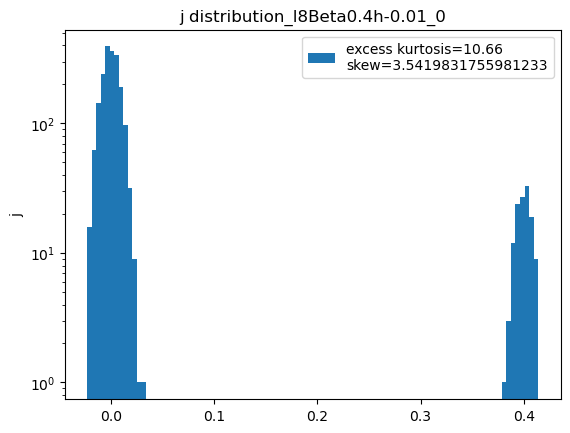

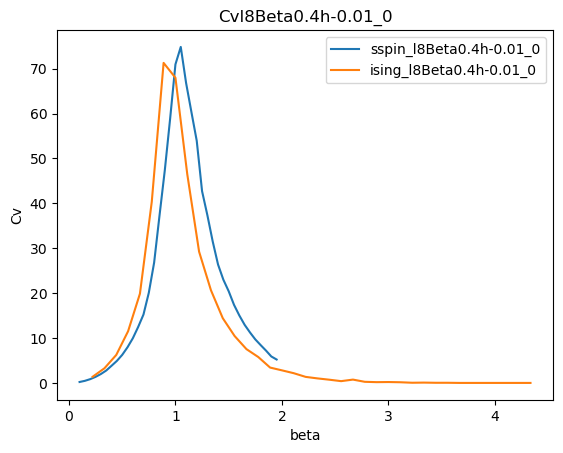

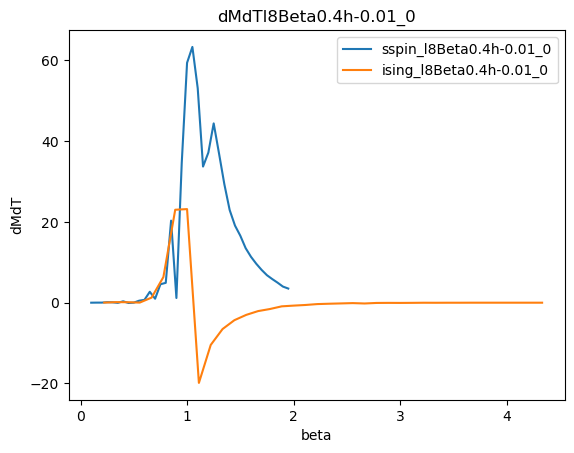

<Figure size 640x480 with 0 Axes>

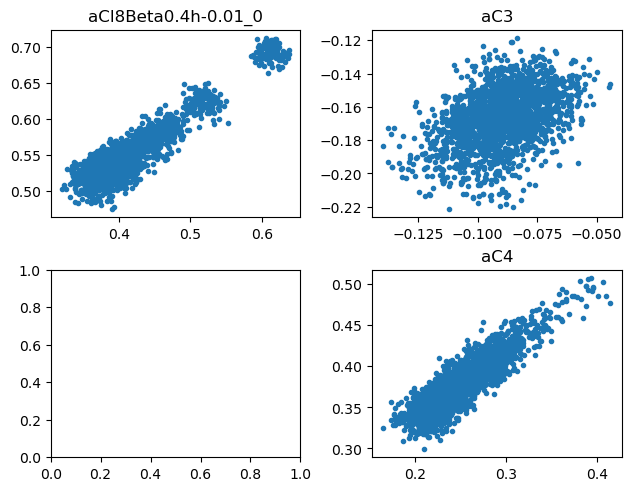

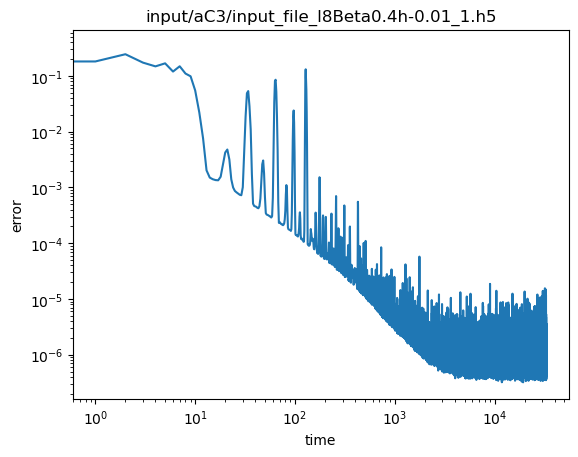

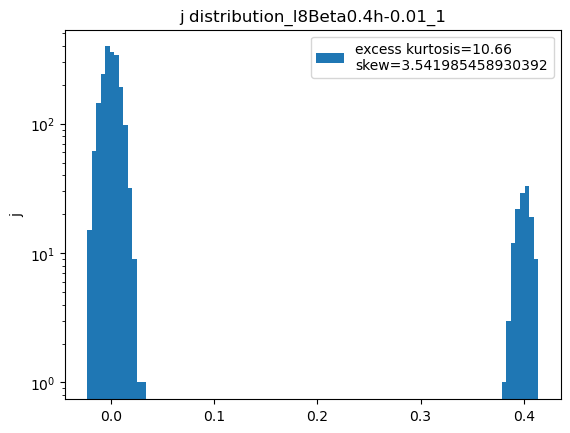

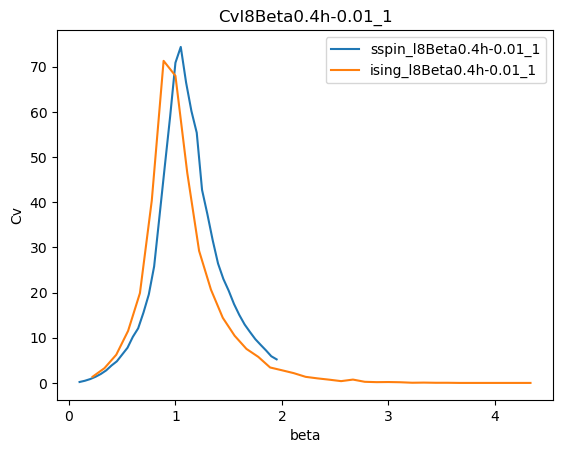

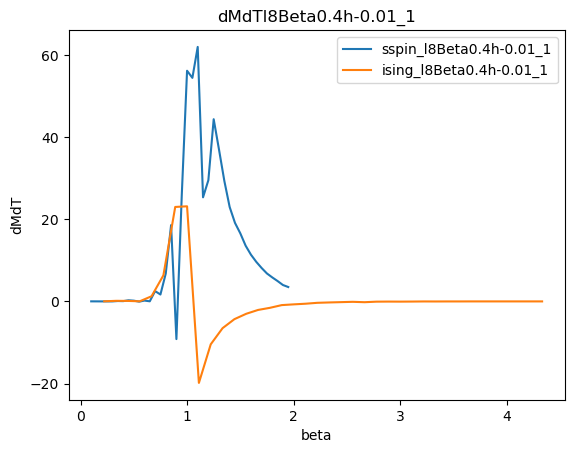

<Figure size 640x480 with 0 Axes>

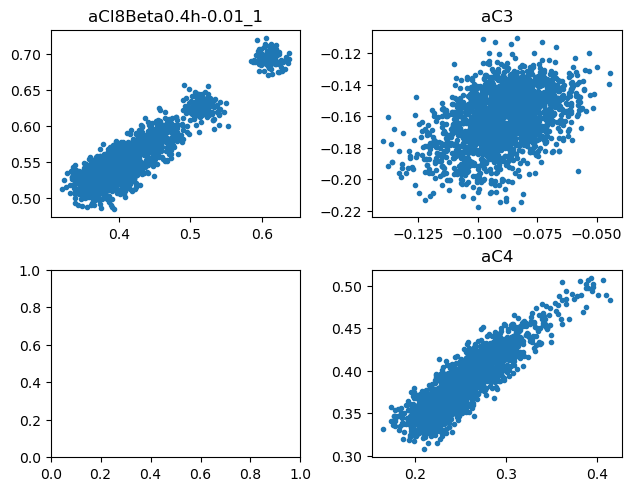

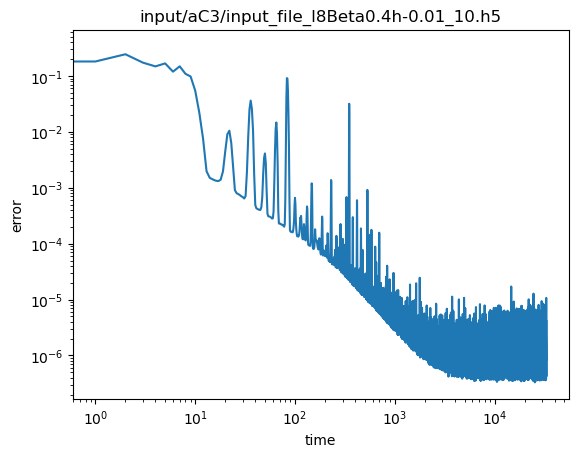

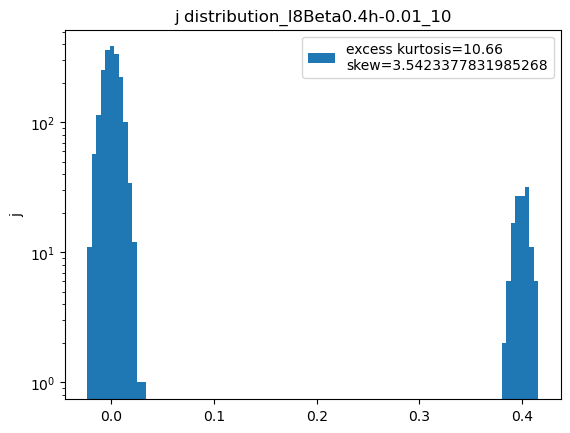

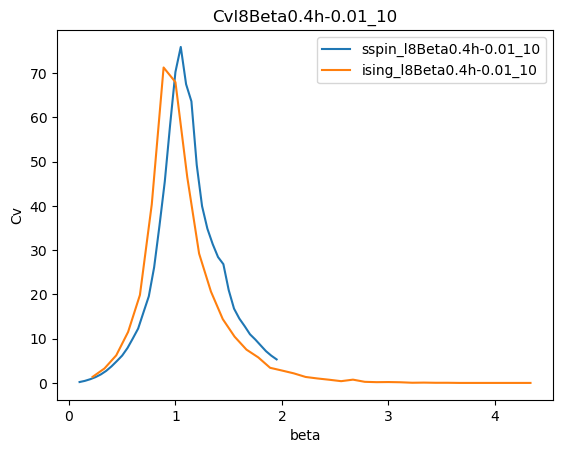

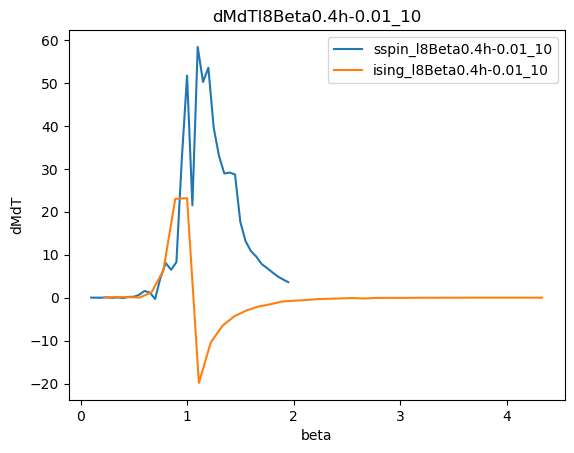

<Figure size 640x480 with 0 Axes>

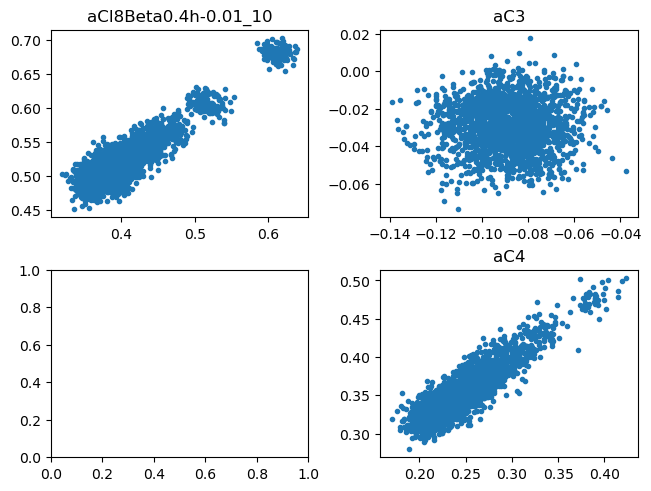

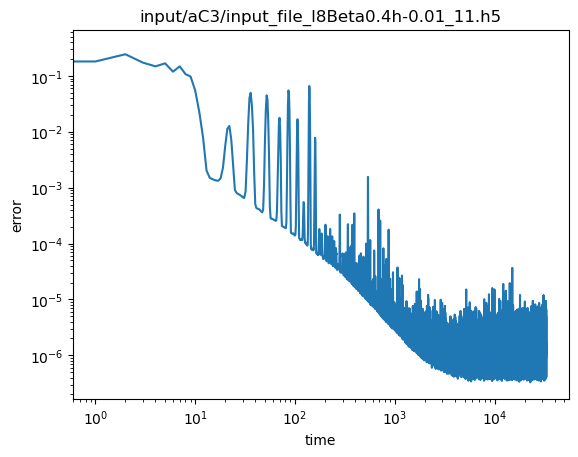

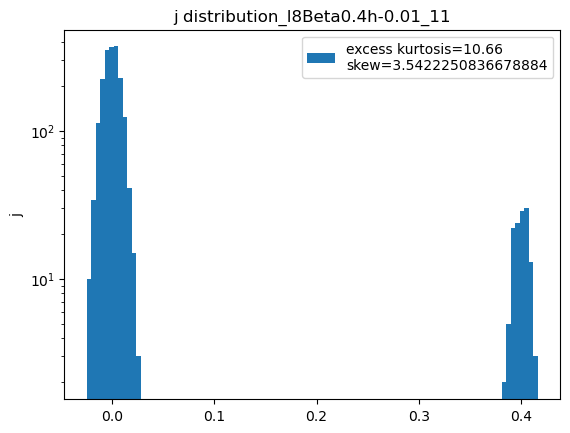

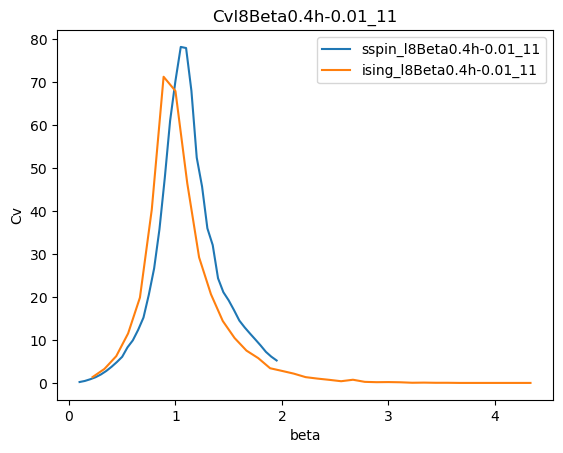

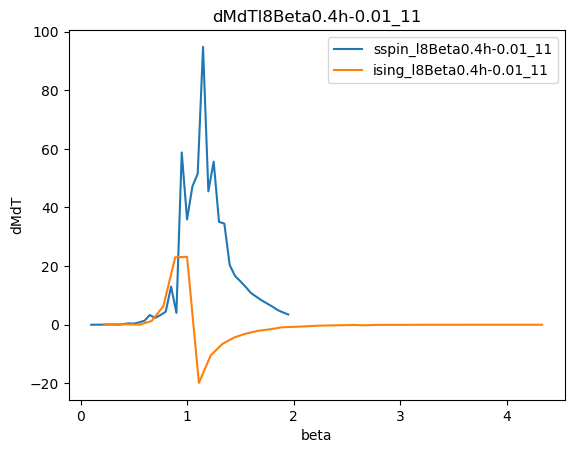

<Figure size 640x480 with 0 Axes>

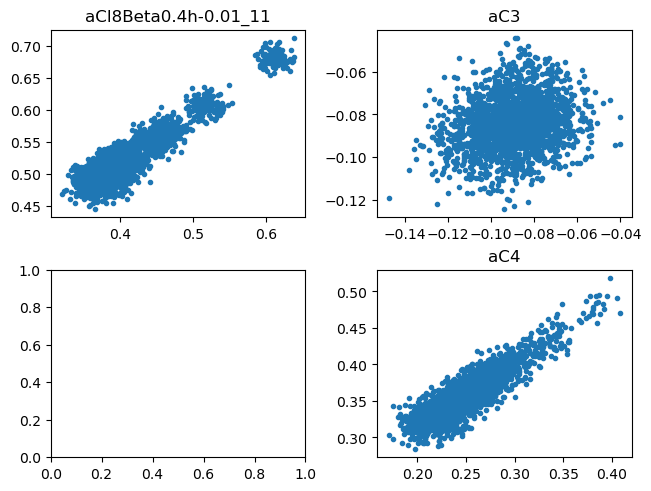

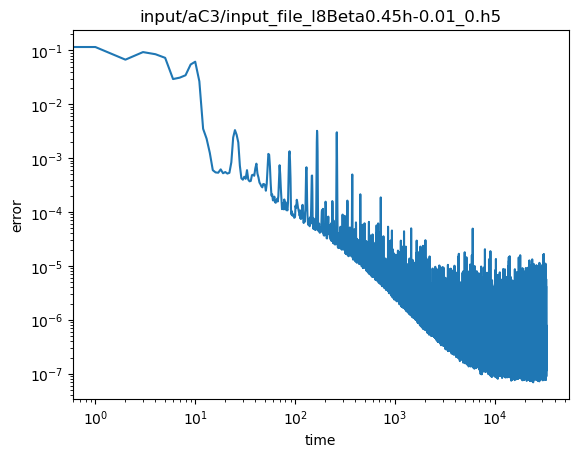

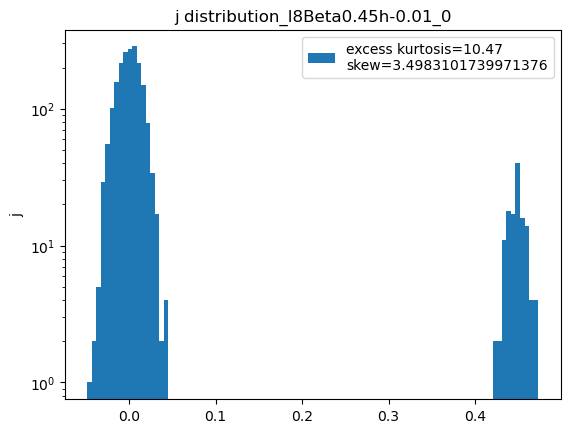

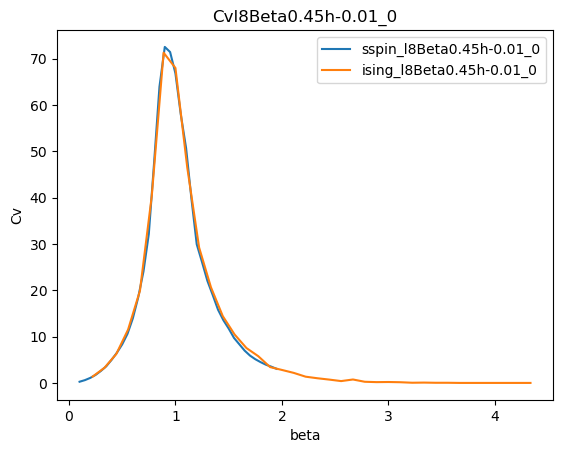

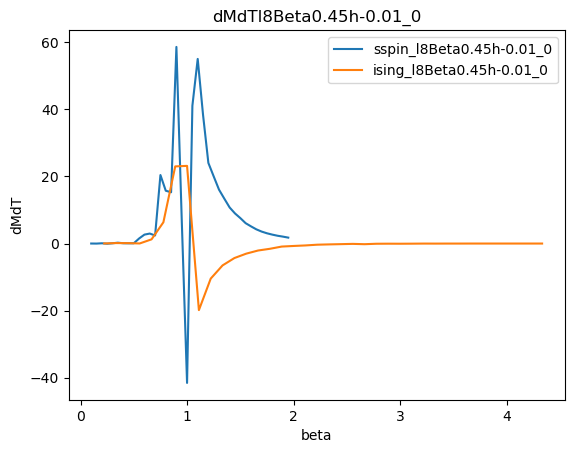

<Figure size 640x480 with 0 Axes>

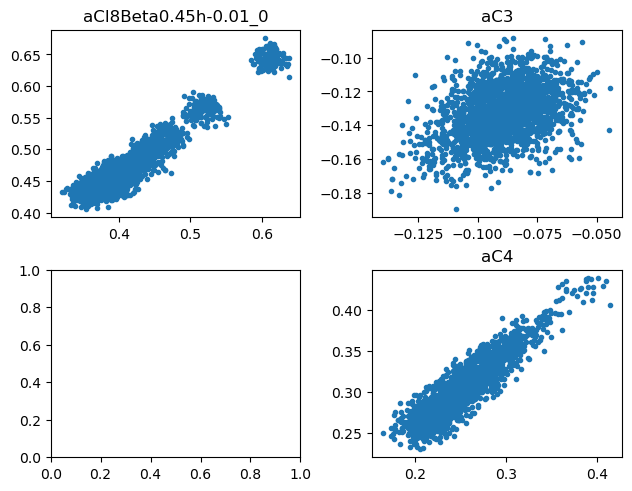

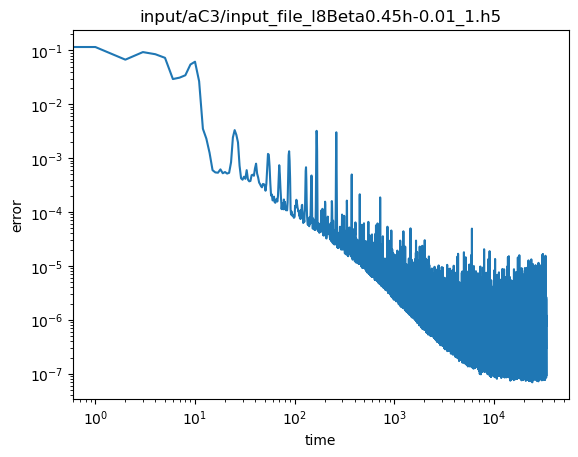

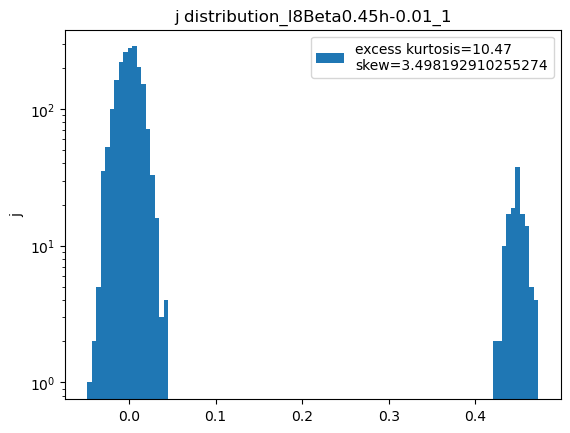

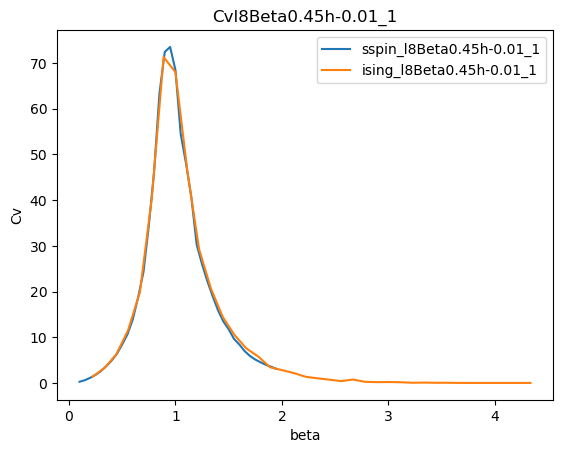

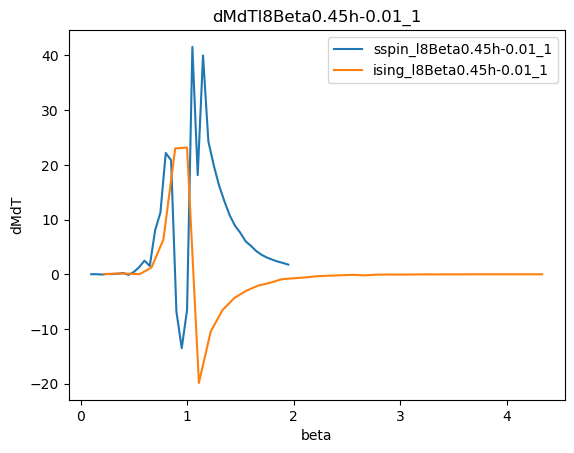

<Figure size 640x480 with 0 Axes>

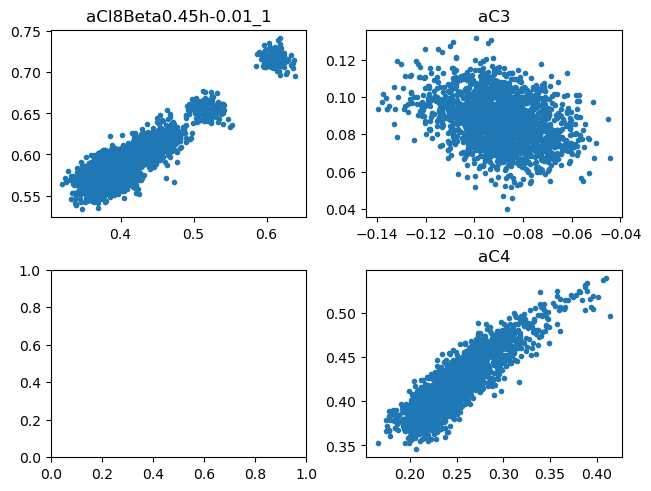

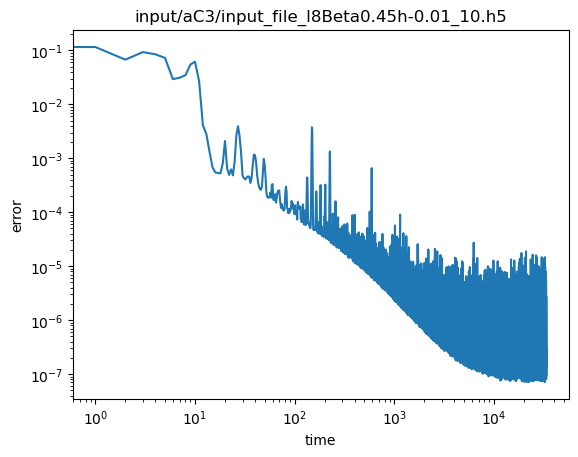

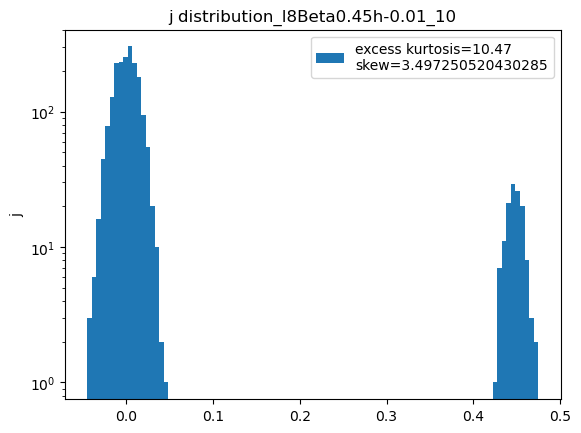

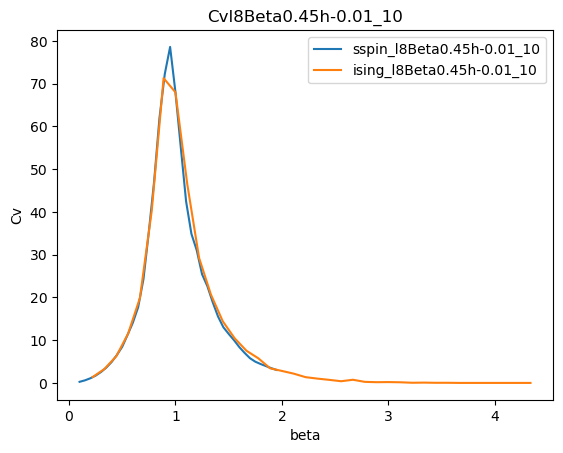

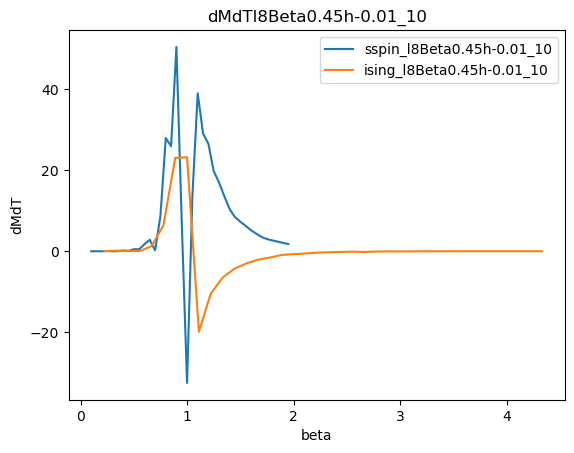

<Figure size 640x480 with 0 Axes>

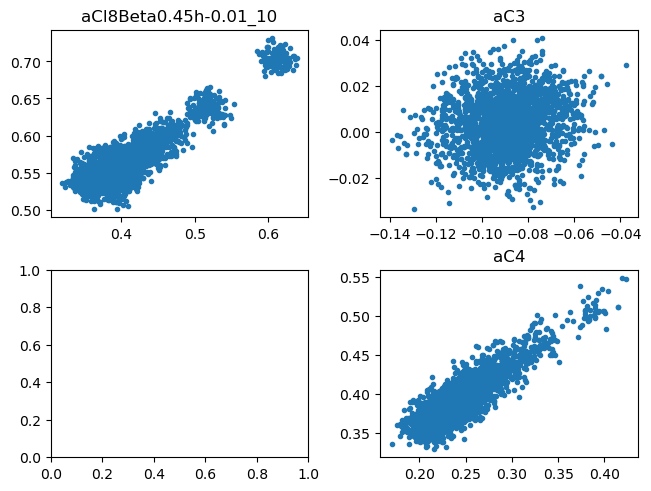

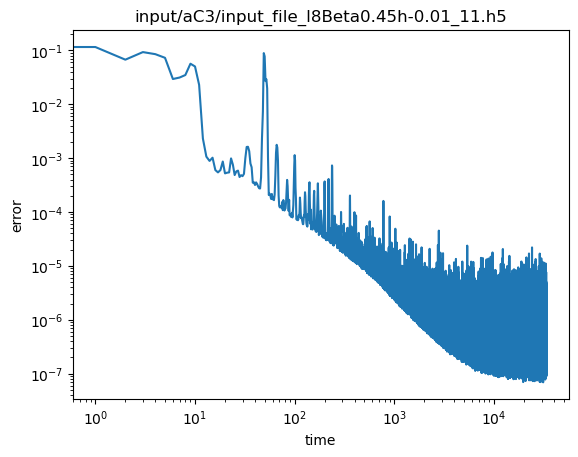

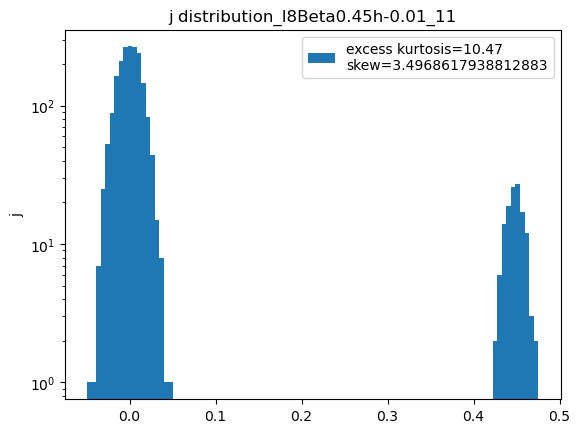

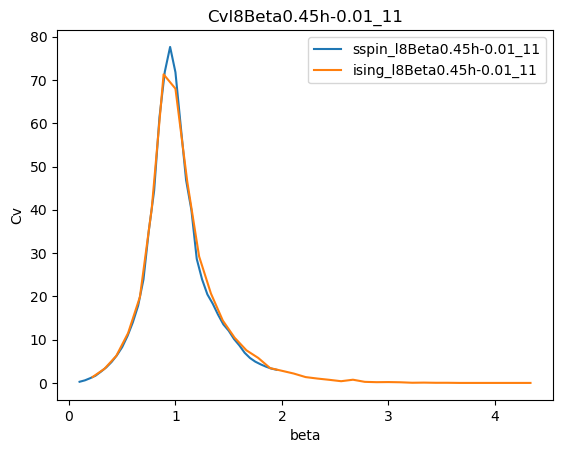

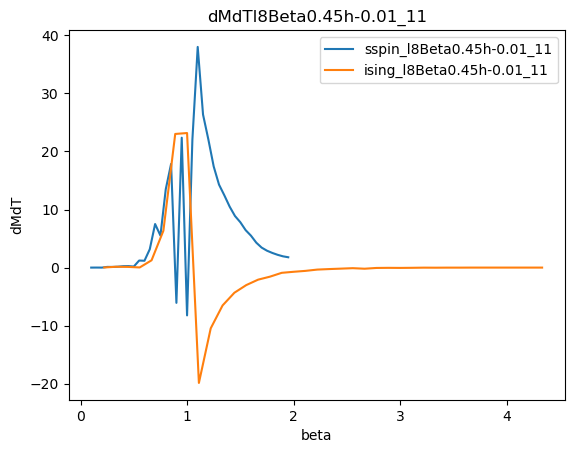

<Figure size 640x480 with 0 Axes>

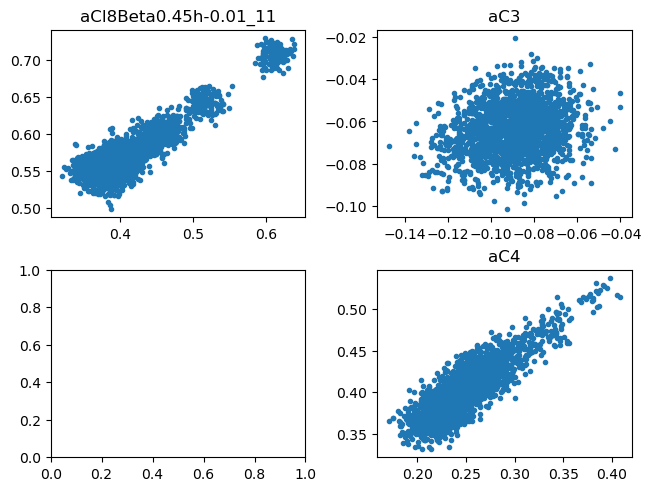

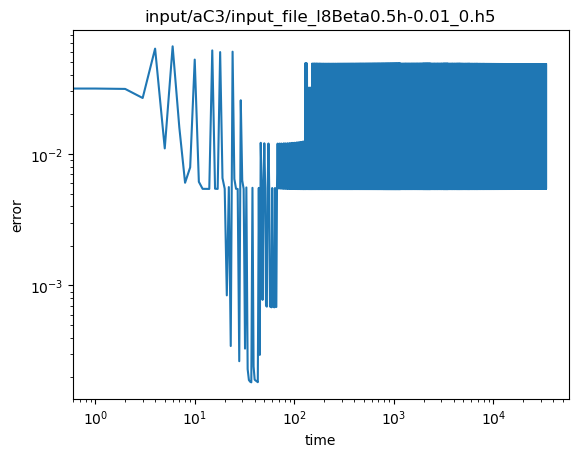

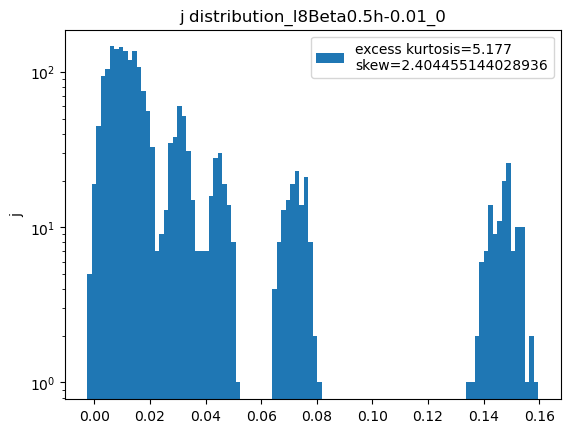

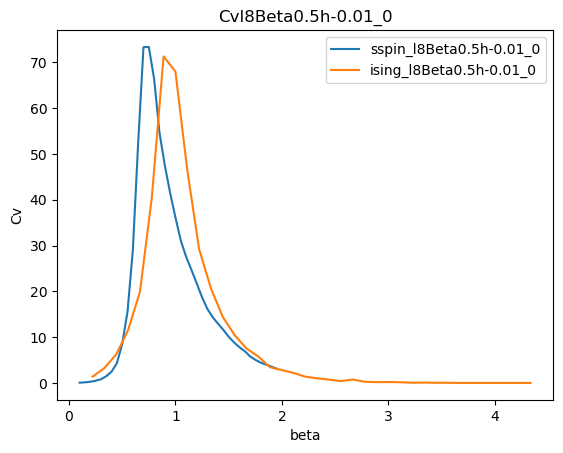

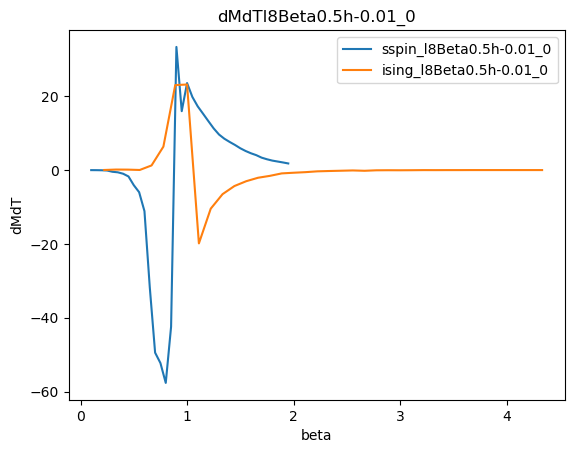

<Figure size 640x480 with 0 Axes>

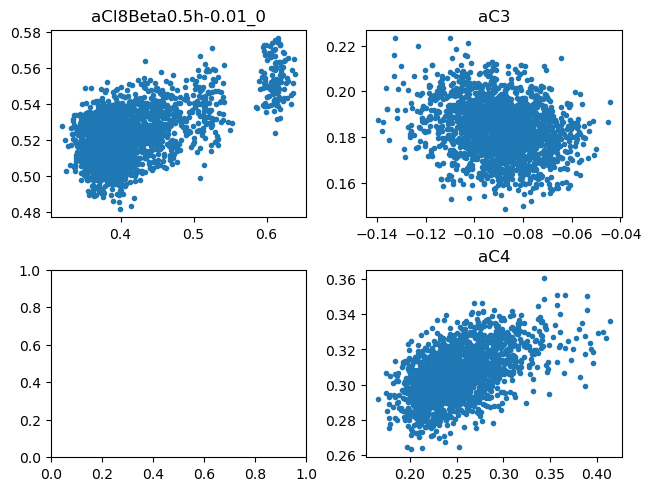

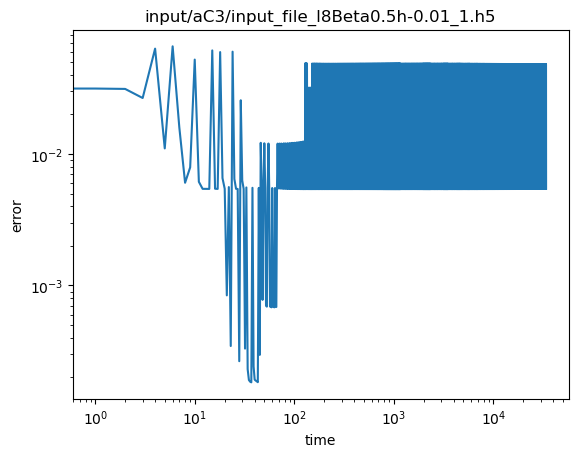

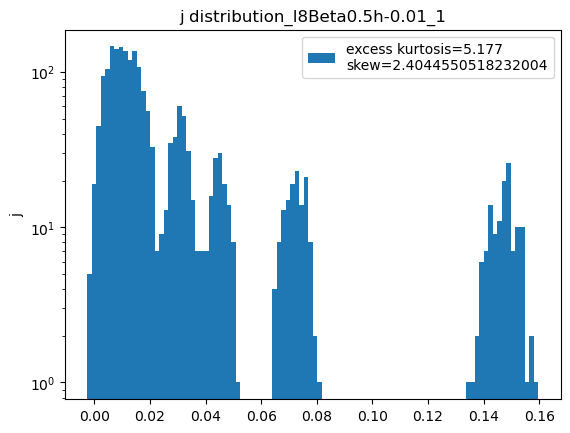

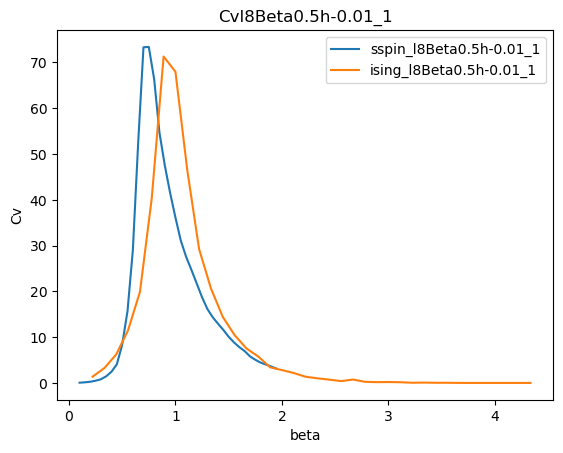

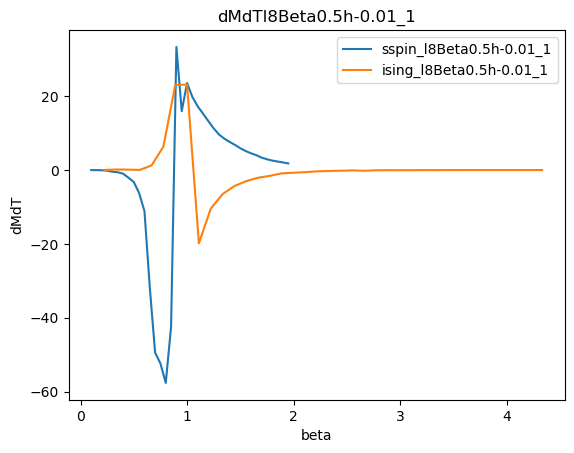

<Figure size 640x480 with 0 Axes>

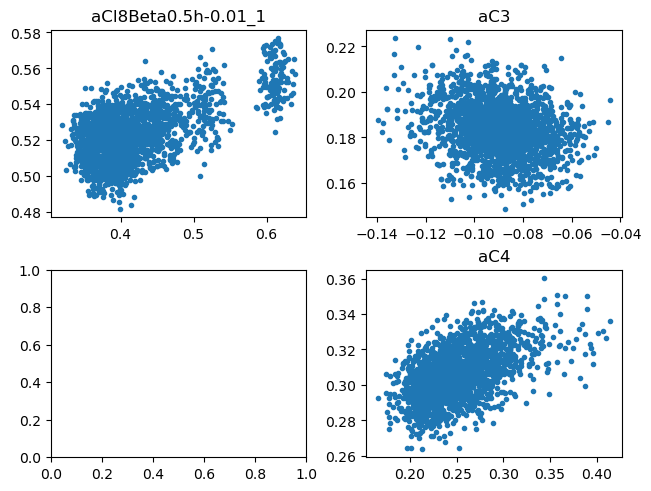

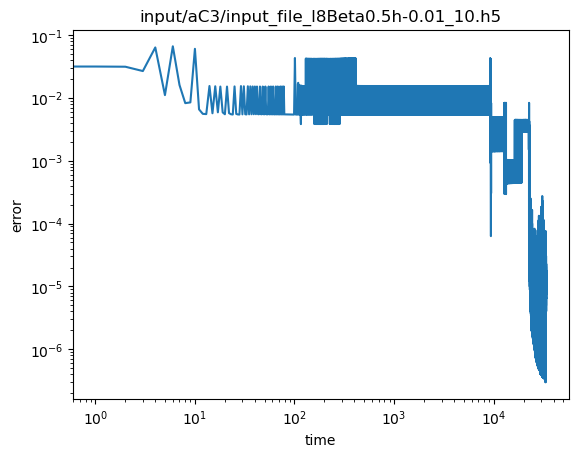

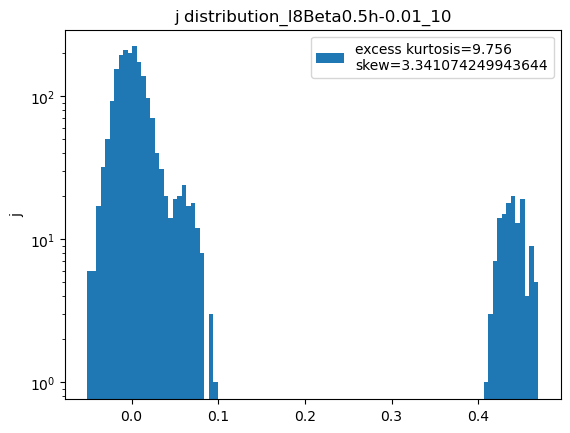

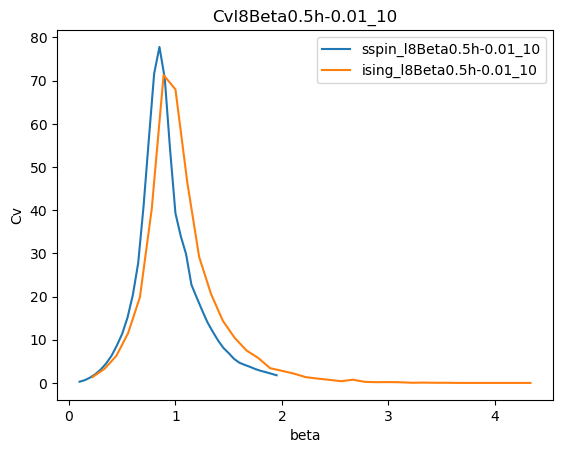

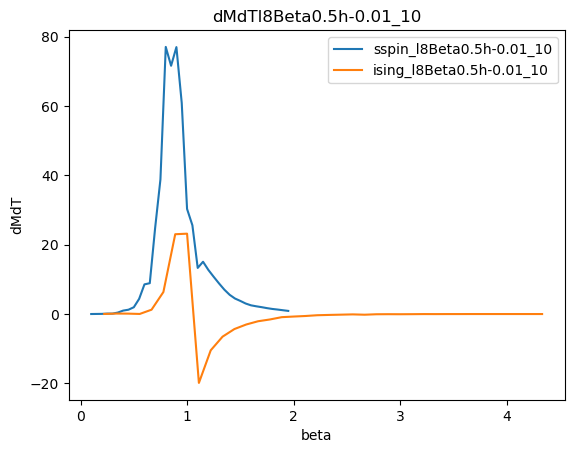

<Figure size 640x480 with 0 Axes>

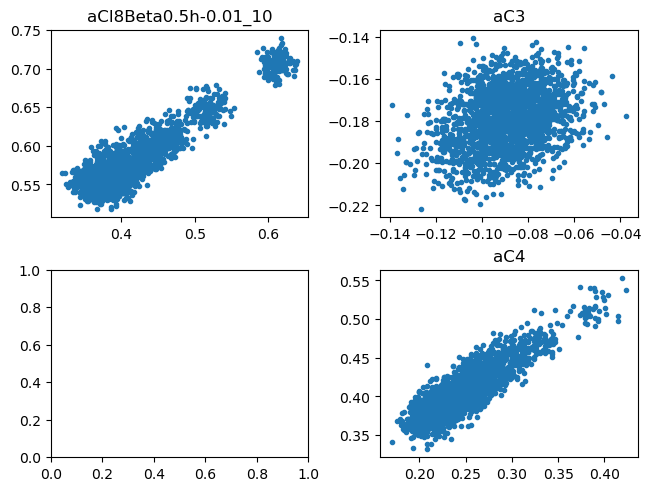

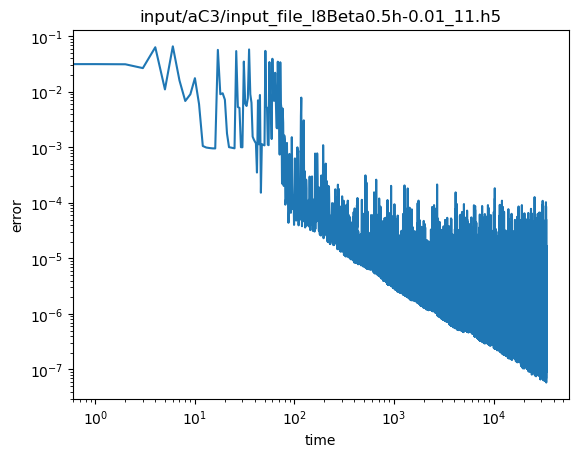

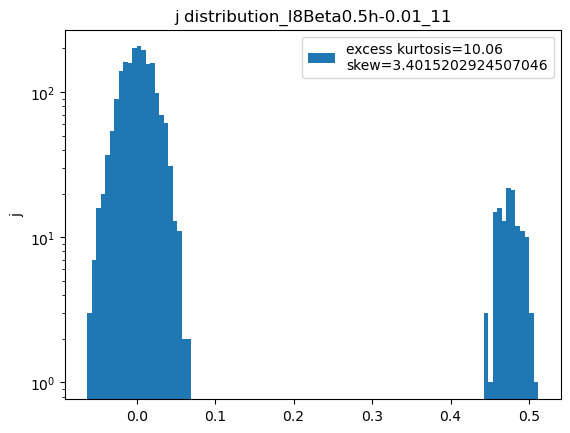

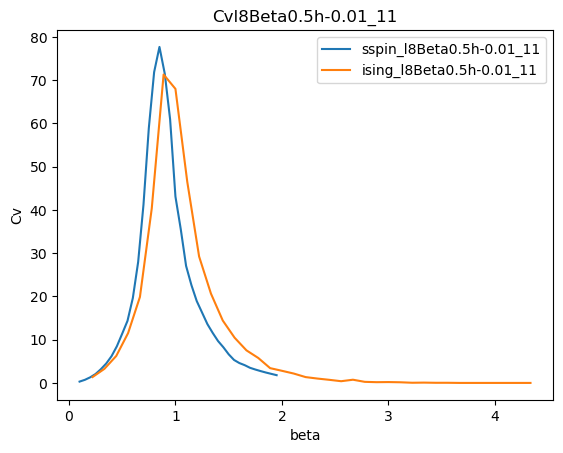

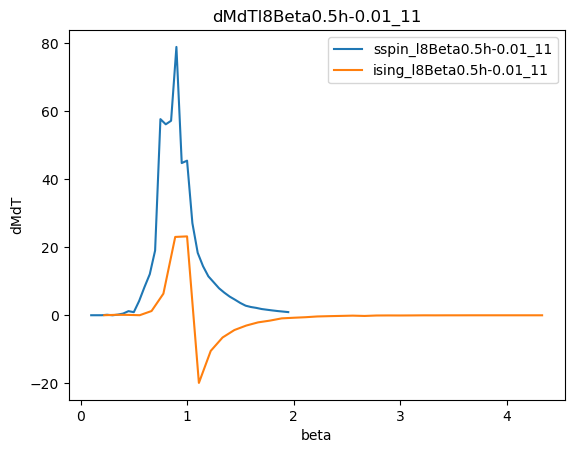

<Figure size 640x480 with 0 Axes>

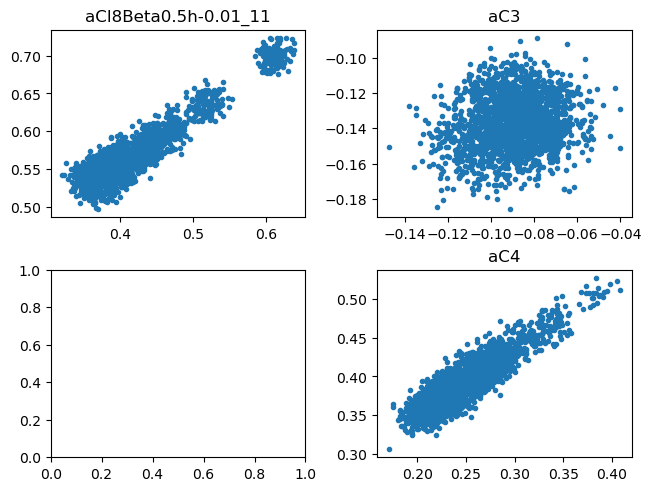

<Figure size 640x480 with 0 Axes>

In [46]:
#Train it with not T
betas=np.linspace(0.1,1.95,38)
betas_ising=[m/0.45 for m in betas]
beta_cris=[0.4,0.45,0.5]
field=-0.01
filenumbers=[0,1,10,11]
linear_size=8

total_ising_Mlist=[]
total_ising_Elist=[]
total_ising_E2list=[]
total_ising_MElist=[]
total_ising_New_Mlist=[]
total_ising_aC_list=[]
total_ising_aC3_list=[]
total_ising_aC4_list=[]
total_ising_draw_list3=[]
total_ising_draw_list4=[]
total_ising_cv=[]
total_ising_dMdT=[]

total_sspin_aC=[]
total_sspin_cv=[]
total_sspin_dMdT=[]
total_sspin_aC3=[]
total_sspin_aC4=[]

name_list=[]
i=0
for betacri in beta_cris:
    for filenumber in filenumbers:
        draw_list3=[]
        draw_list4=[]
        filename=f'selection_mc/aC3/statics_l{linear_size:.03g}Beta{betacri:.03g}h{field:.04g}.h5'
        with h5py.File(filename, "r") as f:

            draw_list3.append(f['draw_list3'][()])
            draw_list4.append(f['draw_list4'][()])
        # print(draw_list3)
        n=f'l{linear_size:.04g}Beta{betacri:.04g}h{field:.04g}_{filenumber}'
        name_list.append(n)
        for beta in betas:
            filename=f'selection_mc/aC3/statics_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}.h5'
            with h5py.File(filename, "r") as f:
                # print("Keys: %s" % f.keys())
                E=list(f['E'][:])
                E2=list(f['E2'][:])
                ME=list(f['ME'][:])
                M=list(f['Mtotal'][:])
                
                total_ising_Elist.append(f['E'][()])
                total_ising_E2list.append(f['E2'][()])
                total_ising_MElist.append(f['ME'][()])
                total_ising_Mlist.append(f['E'][()])

                total_ising_draw_list3.append(f['draw_list3'][()])
                total_ising_draw_list4.append(f['draw_list4'][()])
                
                total_ising_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
                total_ising_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
            filename=f'selection_mc/aC3/subsample_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}_{filenumber}.h5'
            with h5py.File(filename, "r") as f:
                # print("Keys: %s" % f.keys())
                total_ising_aC_list.append(f['c'][()])
                total_ising_aC3_list.append(f['aC3'][()])
                total_ising_aC4_list.append(f['aC4'][()])
        


        data = np.load(f'blresult/aC3/blresult_{n}.npz',allow_pickle=True)
        state=data['state'][()]
        h=state['hjbest'][:64]
        j=state['hjbest'][64:]
        


        filename=f'input/aC3/input_file_{n}.h5'

        with h5py.File(filename, "w") as f:
        # f.create_dataset('h',data=h)
        # f.create_dataset('j',data=j)
            f['h']=h
            f['j']=j
            f['draw_list3']=draw_list3[0]
            f['draw_list4']=draw_list4[0]

        error=data['error'][()]
        plt.plot(error['mses'])
        plt.title(f'{filename}')
        plt.xlabel('time')
        plt.ylabel('error')

        plt.yscale('log')
        plt.xscale('log')
        plt.figure()

        plt.hist(j,bins=100,label=f'excess kurtosis={kurtosis(j):.04g}\nskew={skew(j)}')
        plt.ylabel('j')
        plt.yscale('log')
        plt.title(f'j distribution_{n}')
        plt.legend()
        plt.figure()
        # sspin_config2_allh001=[]
        # print(filename)
        niter=100000

        for beta in betas:
            prmf=filename
            datf = f'output/aC3/output_l{linear_size:.04g}betacri{betacri}Beta{beta:.04g}h{field:.04g}_{filenumber}.h5'
            system(f'nice -n +20 ./sspin2 {prmf} {datf} {niter} --beta={beta:.03g}')
            with h5py.File(datf, "r") as f:
                E = f['result1']['aE'][()]
                E2 =f['result1']['aE2'][()]
                M=f['result1']['aM'][()]
                M2=f['result1']['aM2'][()]
                ME=f['result1']['aME'][()]
                aC=f['result1']['aC'][()]
                aC3=f['result1']['aC3'][()]
                aC4=f['result1']['aC4'][()]

                cnt=f['result1']['cnt'][()]
                # print(E)
                total_sspin_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
                total_sspin_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
                total_sspin_aC.append(aC)
                total_sspin_aC3.append(aC3)
                total_sspin_aC4.append(aC4)

        print(sspin_index:=np.argmin(np.abs(np.array(total_sspin_cv[i*38:(i+1)*38])-max(total_sspin_cv[i*38:(i+1)*38]))))
        print(ising_index:=np.argmin(np.abs(np.array(total_ising_cv[i*38:(i+1)*38])-max(total_ising_cv[i*38:(i+1)*38]))))
        # new_total_sspin_aC=[m/10000 for m in total_sspin_aC[sspin_index][i:i+2000]]
        # new_total_sspin_aC3=[m/10000 for m in total_sspin_aC3[sspin_index][i:i+2000]]
        # new_total_sspin_aC4=[m/10000 for m in total_sspin_aC4[sspin_index][i:i+2000]]
        # new_total_ising_aC_list=total_ising_aC_list[ising_index][i:i+2000]
        # new_total_ising_aC3_list=total_ising_aC3_list[ising_index][i:i+2000]
        # new_total_ising_aC4_list=total_ising_aC4_list[ising_index][i:i+2000]

        plt.plot(betas,total_sspin_cv[i*38:(i+1)*38],label=f'sspin_{n}')
        plt.plot(betas_ising,total_ising_cv[i*38:(i+1)*38],label=f'ising_{n}')
        plt.xlabel('beta')
        plt.ylabel('Cv')
        plt.title(f'Cv{n}')
        plt.legend()
        plt.figure()

        plt.plot(betas,total_sspin_dMdT[i*38:(i+1)*38],label=f'sspin_{n}')
        plt.plot(betas_ising,total_ising_dMdT[i*38:(i+1)*38],label=f'ising_{n}')
        plt.xlabel('beta')
        plt.ylabel('dMdT')
        plt.title(f'dMdT{n}')
        plt.legend()
        plt.figure()
        

        fig, ax = plt.subplots(2,2,constrained_layout = True)
        ax[0,0].set_title(f'aC{n}')
        ax[0,0].plot(total_ising_aC_list[ising_index+i*38][:],total_sspin_aC[sspin_index+i*38][:],'.',label=f'sspin_{n}',)
        ax[0,1].set_title('aC3')
        ax[0,1].plot(total_ising_aC3_list[ising_index+i*38][:],total_sspin_aC3[sspin_index+i*38][:],'.',label=f'sspin_{n}')
        ax[1,1].set_title('aC4')
        ax[1,1].plot(total_ising_aC4_list[ising_index+i*38][:],total_sspin_aC4[sspin_index+i*38][:],'.',label=f'sspin_{n}')
        plt.figure()
        i+=1

In [32]:
linear_size=8
beta=0.45
field=-0.01
chosen_indice=[]

for i in range(18):
    filename=f'selection_mc/aC3/subsample_l{linear_size:.03g}Beta{beta:.03g}h{field:.04g}_{i}.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        chosen_indice.append(f['chosen_indices'][:])
    # E=list(f['E'][:])
    # E2=list(f['E2'][:])
    # ME=list(f['ME'][:])
    # M=list(f['Mtotal'][:])
    
    print(chosen_indice[i])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[37 54 39 24 19  3 17 30 51 25 53 21 41 23 61  8 55 33 43 46 34 48  6 11
 47 13 20  9 14 57 28 62 10 22 38  2 40 63 26 49 60 42  0 56 32  1 44 58
 36  5 16 35 45 18 27  7 15 31 29 50  4 12 59 52]
[63 59  8 15 25 24 42 54 20 33 28 14 34 58 29 27 60 49 45 51  5 55 53 17
  3 37 26 12 18  9 50  2 39 19  4 30  6 57  7 36 61 16 31 48  1 56 41 23
 40 44 22  0 35 47 32 13 11 52 10 62 46 43 38 21]
[11 59 60 31 20  9 44  7 40 52 43 37 46 16 34 26 62 19 18 36 14 49 10 23
 29 41 50 42 39 63 54 32 13 51 22 17 47 27 56 45 30 61 48 33 35 25  0 58
 21 24 38  6 57  2 53  5  1 55  3 28  8 15  4 12]
[ 4 53  7 36 27  1  

18
7


<Figure size 640x480 with 0 Axes>

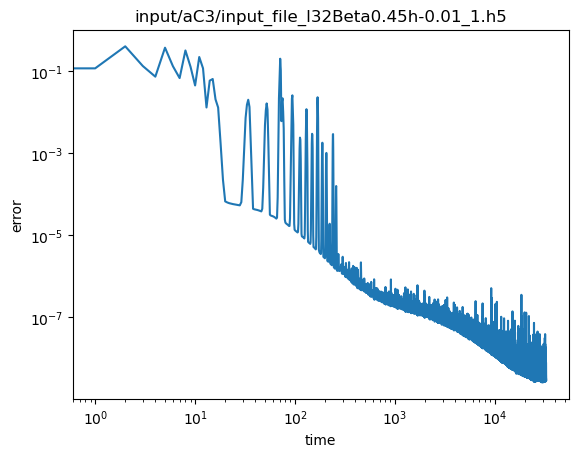

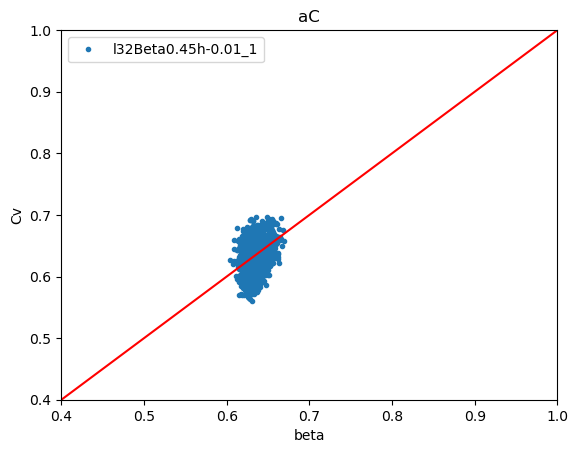

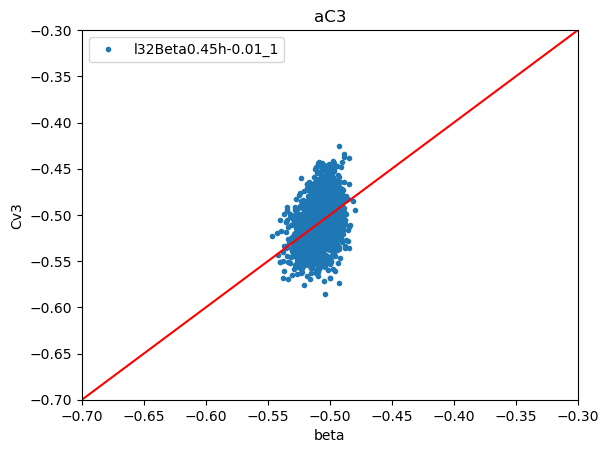

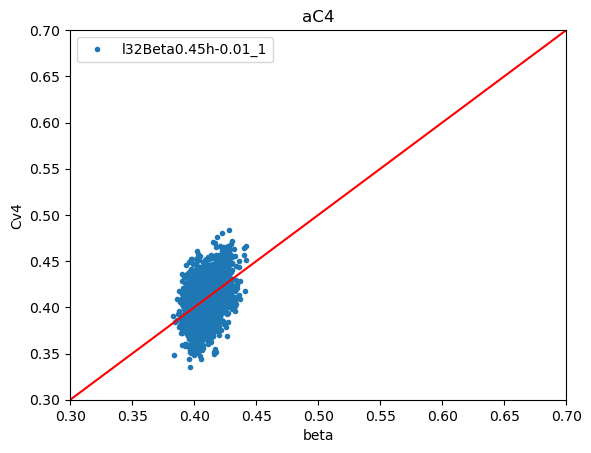

<Figure size 640x480 with 0 Axes>

In [13]:
betas=np.linspace(0.1,1.95,38)
beta_cri=0.45
field=-0.01
linear_size=32

l32ising_Mlist=[]
l32ising_Elist=[]
l32ising_E2list=[]
l32ising_MElist=[]
l32ising_New_Mlist=[]
l32ising_aC_list=[]
l32ising_aC3_list=[]
l32ising_aC4_list=[]
l32ising_draw_list3=[]
l32ising_draw_list4=[]
l32ising_cv=[]
l32ising_dMdT=[]

n=f'l{linear_size:.04g}Beta{beta_cri:.04g}h{field:.04g}_1'

static_file=f'selection_mc/aC3/statics_{n}.h5'
for beta in betas:
    filename=f'selection_mc/aC3/statics_l32Beta{beta:.03g}h{field:.04g}.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        E=list(f['E'][:])
        E2=list(f['E2'][:])
        ME=list(f['ME'][:])
        M=list(f['Mtotal'][:])
        
        l32ising_Elist.append(f['E'][()])
        l32ising_E2list.append(f['E2'][()])
        l32ising_MElist.append(f['ME'][()])
        l32ising_Mlist.append(f['E'][()])

        l32ising_draw_list3.append(f['draw_list3'][()])
        l32ising_draw_list4.append(f['draw_list4'][()])
        
        l32ising_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
        l32ising_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
    filename=f'selection_mc/aC3/subsample_l32Beta{beta:.03g}h{field:.04g}_1.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        l32ising_aC_list.append(f['c'][()])
        l32ising_aC3_list.append(f['aC3'][()])
        l32ising_aC4_list.append(f['aC4'][()])

data = np.load(f'blresult/aC3/blresult_{n}.npz',allow_pickle=True)
# lst = data.files
# print(lst)
# for item in lst:
#     # print(item)
#     print(data[item])w
state=data['state'][()]
h=state['hjbest'][:64]
j=state['hjbest'][64:]



filename=f'input/aC3/input_file_{n}.h5'
with h5py.File(filename, "w") as f:
# f.create_dataset('h',data=h)
# f.create_dataset('j',data=j)
    f['h']=h
    f['j']=j
    f['draw_list3']=l32ising_draw_list3[0]
    f['draw_list4']=l32ising_draw_list4[0]
error=data['error'][()]
plt.plot(error['mses'])
plt.title(f'{filename}')
plt.xlabel('time')
plt.ylabel('error')

plt.yscale('log')
plt.xscale('log')
plt.figure()
l32sspin_aC=[]
l32sspin_cv=[]
l32sspin_dMdT=[]
l32sspin_aC3=[]
l32sspin_aC4=[]
# sspin_config2_allh001=[]
# print(filename)
niter=100000

for beta in betas:
    prmf=filename
    datf = f'output/aC3/output_l{linear_size:.04g}Beta{beta:.04g}h{field:.04g}_1.h5'
    system(f'nice -n +20 ./sspin2 {prmf} {datf} {niter} --beta={beta:.03g}')
    with h5py.File(datf, "r") as f:
        E = f['result1']['aE'][()]
        E2 =f['result1']['aE2'][()]
        M=f['result1']['aM'][()]
        M2=f['result1']['aM2'][()]
        ME=f['result1']['aME'][()]
        aC=f['result1']['aC'][()]
        aC3=f['result1']['aC3'][()]
        aC4=f['result1']['aC4'][()]

        cnt=f['result1']['cnt'][()]
        # print(E)
        l32sspin_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
        l32sspin_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
        l32sspin_aC.append(aC)
        l32sspin_aC3.append(aC3)
        l32sspin_aC4.append(aC4)

print(sspin_index:=np.argmin(np.abs(np.array(l32sspin_cv)-max(l32sspin_cv))))
print(ising_index:=np.argmin(np.abs(np.array(l32ising_cv)-max(l32ising_cv))))

# print(betas[sspin_index])
# newsspin_aC=[x/10000 for x in l32sspin_aC[sspin_index]]
# newsspin_aC3=[x/10000 for x in l32sspin_aC3[sspin_index]]
# newsspin_aC4=[x/10000 for x in l32sspin_aC4[sspin_index]]
x=np.linspace(-100,100,100)
# print(np.array(l32ising_aC_list[beta_index]).shape)
plt.plot(l32ising_aC_list[ising_index],l32sspin_aC[sspin_index],'.',label=f'{n}',)
plt.plot(x,x,color='r')
plt.ylim(0.4, 1)
plt.xlim(0.4, 1)
plt.xlabel('beta')
plt.ylabel('Cv')
plt.title('aC')
plt.legend()
plt.figure()

plt.plot(l32ising_aC3_list[ising_index],l32sspin_aC3[sspin_index],'.',label=f'{n}',)
plt.plot(x,x,color='r')
plt.ylim(-0.7, -0.3)
plt.xlim(-0.7, -0.3)
plt.xlabel('beta')
plt.ylabel('Cv3')
plt.title('aC3')
plt.legend()
plt.figure()

plt.plot(l32ising_aC4_list[ising_index],l32sspin_aC4[sspin_index],'.',label=f'{n}',)
plt.plot(x,x,color='r')
plt.ylim(0.3, 0.7)
plt.xlim(0.3, 0.7)
plt.xlabel('beta')
plt.ylabel('Cv4')
plt.title('aC4')
plt.legend()
plt.figure()

In [ ]:
betas=np.linspace(0.1,1.95,38)
beta_cri=0.45
field=-0.01
linear_size=32

l32ising_Mlist=[]
l32ising_Elist=[]
l32ising_E2list=[]
l32ising_MElist=[]
l32ising_New_Mlist=[]
l32ising_aC_list=[]
l32ising_aC3_list=[]
l32ising_aC4_list=[]
l32ising_draw_list3=[]
l32ising_draw_list4=[]
l32ising_cv=[]
l32ising_dMdT=[]

n=f'l{linear_size:.04g}Beta{beta_cri:.04g}h{field:.04g}_10'

static_file=f'selection_mc/aC3/statics_{n}.h5'
for beta in betas:
    filename=f'selection_mc/aC3/statics_l32Beta{beta:.03g}h{field:.04g}.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        E=list(f['E'][:])
        E2=list(f['E2'][:])
        ME=list(f['ME'][:])
        M=list(f['Mtotal'][:])
        
        l32ising_Elist.append(f['E'][()])
        l32ising_E2list.append(f['E2'][()])
        l32ising_MElist.append(f['ME'][()])
        l32ising_Mlist.append(f['E'][()])

        l32ising_draw_list3.append(f['draw_list3'][()])
        l32ising_draw_list4.append(f['draw_list4'][()])
        
        l32ising_cv.append(beta*beta*(E2[0]-E[0]*E[0]))
        l32ising_dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
    filename=f'selection_mc/aC3/subsample_l32Beta{beta:.03g}h{field:.04g}_10.h5'
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        l32ising_aC_list.append(f['c'][()])
        l32ising_aC3_list.append(f['aC3'][()])
        l32ising_aC4_list.append(f['aC4'][()])

data = np.load(f'blresult/aC3/blresult_{n}.npz',allow_pickle=True)
# lst = data.files
# print(lst)
# for item in lst:
#     # print(item)
#     print(data[item])w
state=data['state'][()]
h=state['hjbest'][:64]
j=state['hjbest'][64:]



filename=f'input/aC3/input_file_{n}.h5'
with h5py.File(filename, "w") as f:
# f.create_dataset('h',data=h)
# f.create_dataset('j',data=j)
    f['h']=h
    f['j']=j
    f['draw_list3']=l32ising_draw_list3[0]
    f['draw_list4']=l32ising_draw_list4[0]
error=data['error'][()]
plt.plot(error['mses'])
plt.title(f'{filename}')
plt.xlabel('time')
plt.ylabel('error')

plt.yscale('log')
plt.xscale('log')

l32sspin_aC=[]
l32sspin_cv=[]
l32sspin_dMdT=[]
l32sspin_aC3=[]
l32sspin_aC4=[]
# sspin_config2_allh001=[]
# print(filename)
niter=10000

for beta in betas:
    prmf=filename
    datf = f'output/aC3/output_sspin2_{n}.h5'
    system(f'nice -n +20 ./sspin2 {prmf} {datf} {niter} --beta={beta:.03g}')
    with h5py.File(datf, "r") as f:
        E = f['result1']['aE'][()]
        E2 =f['result1']['aE2'][()]
        M=f['result1']['aM'][()]
        M2=f['result1']['aM2'][()]
        ME=f['result1']['aME'][()]
        aC=f['result1']['aC'][()]
        aC3=f['result1']['aC3'][()]
        aC4=f['result1']['aC4'][()]

        cnt=f['result1']['cnt'][()]
        # print(E)
        l32sspin_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
        l32sspin_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
        l32sspin_aC.append(aC)
        l32sspin_aC3.append(aC3)
        l32sspin_aC4.append(aC4)

    datf = f'output/aC3/output_sspin1_{n}.h5'
    system(f'nice -n +20 ./sspin1 {prmf} {datf} {niter} --beta={beta:.03g}')
    with h5py.File(datf, "r") as f:
        E = f['result1']['aE'][()]
        E2 =f['result1']['aE2'][()]
        M=f['result1']['aM'][()]
        M2=f['result1']['aM2'][()]
        ME=f['result1']['aME'][()]
        aC=f['result1']['aC'][()]
        aC3=f['result1']['aC3'][()]
        aC4=f['result1']['aC4'][()]

        cnt=f['result1']['cnt'][()]
        # print(E)
        l32sspin_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
        l32sspin_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
        l32sspin_aC.append(aC)
        l32sspin_aC3.append(aC3)
        l32sspin_aC4.append(aC4)